<a href="https://colab.research.google.com/github/tirth5828/Codes/blob/main/Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from numpy import reshape
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [29]:
df = pd.read_csv("/content/prob_distribution_summary02.csv")

In [30]:
df

Unnamed: 0     gram language1  language2        l1        l2        kl  \
0             0  unigram   Bengali    Bengali  0.000000  0.000000  0.000000   
1             1  unigram   Bengali      Hindi  1.197695  0.251520  1.107147   
2             2  unigram   Bengali  Malayalam  1.139308  0.255825  0.344550   
3             3  unigram   Bengali    Marathi  1.240274  0.273421  0.479145   
4             4  unigram   Bengali      Oriya  0.775282  0.147180  0.060578   
..          ...      ...       ...        ...       ...       ...       ...   
130         130  trigram     Tamil     Telugu  1.882908  0.064498  0.978340   
131         131  trigram     Tamil       Urdu  1.997104  0.076940  0.001728   
132         132  trigram    Telugu     Telugu  0.000000  0.000000  0.000000   
133         133  trigram    Telugu       Urdu  1.987495  0.069864  0.007473   
134         134  trigram      Urdu       Urdu  0.000000  0.000000  0.000000   

          rao  dot_product  
0    0.000000     1.000000  
1    2.105785     0.397652  
2    1.443135     0.547197  
3    1.912682     0.320647  
4    0.957904     0.833482  
..        ...          ...  
130  2.897703     0.040207  
131  2.482482     0.000135  
132  0.000000     1.000000  
133  2.316868     0.001294  
134  0.000000     1.000000  

[135 rows x 9 columns]

In [31]:
parameters = ['l1','l2','kl','rao','dot_product']

In [32]:
list_of_languages = []
for i in df["language2"].unique():
  list_of_languages.append(i)

In [33]:
name_list = ["Unigram" , "Bigram" , "Trigram"]
matrix_unigram = []
for q in range(len(parameters)):
  matrix_unigram.append([])
  for i in range(len(list_of_languages)):
    matrix_unigram[q].append([])
    for j in range(len(list_of_languages)):
      matrix_unigram[q][i].append(0)

matrix_bigram = []
for q in range(len(parameters)):
  matrix_bigram.append([])
  for i in range(len(list_of_languages)):
    matrix_bigram[q].append([])
    for j in range(len(list_of_languages)):
      matrix_bigram[q][i].append(0)
    
matrix_trigram = []
for q in range(len(parameters)):
  matrix_trigram.append([])
  for i in range(len(list_of_languages)):
    matrix_trigram[q].append([])
    for j in range(len(list_of_languages)):
      matrix_trigram[q][i].append(0)


In [34]:
for p,parameter in enumerate(parameters):  
  for i,language1 in enumerate(list_of_languages):
    for j,language2 in enumerate(list_of_languages):
      try:
        matrix_unigram[p][i][j] = float(df[(df['gram']=="unigram") & (df['language1']==language1) & (df['language2']==language2)][parameter])
      except:
        matrix_unigram[p][i][j] = float(df[(df['gram']=="unigram") & (df['language1']==language2) & (df['language2']==language1)][parameter])


      try:
        matrix_bigram[p][i][j] = float(df[(df['gram']=="bigram") & (df['language1']==language1) & (df['language2']==language2)][parameter])
      except:
        matrix_bigram[p][i][j] = float(df[(df['gram']=="bigram") & (df['language1']==language2) & (df['language2']==language1)][parameter])

      
      try:
        matrix_trigram[p][i][j] = float(df[(df['gram']=="trigram") & (df['language1']==language1) & (df['language2']==language2)][parameter])
      except:
        matrix_trigram[p][i][j] = float(df[(df['gram']=="trigram") & (df['language1']==language2) & (df['language2']==language1)][parameter])

In [9]:
# for i,language1 in enumerate(list_of_languages):
#   for j,language2 in enumerate(list_of_languages):
#     with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_{language2}_dot_product_unigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as a:
#       matrix_unigram[i][j] = float(a.read())
#     with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_{language2}_dot_product_bigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as b:
#       matrix_bigram[i][j] = float(b.read())
#     with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_{language2}_dot_product_trigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as c:
#       matrix_trigram[i][j] = float(c.read())

In [35]:
# array_unigram = np.array(matrix_unigram)
# array_bigram = np.array(matrix_bigram)
# array_trigram = np.array(matrix_trigram)

# arrays_list = [array_unigram,array_bigram,array_trigram]
arrays_list = []
for q in range(len(parameters)):
  arrays_list.append([])
for q in range(len(parameters)):
  arrays_list[q] = [np.array(matrix_unigram[q]) , np.array(matrix_bigram[q]) , np.array(matrix_trigram[q])]

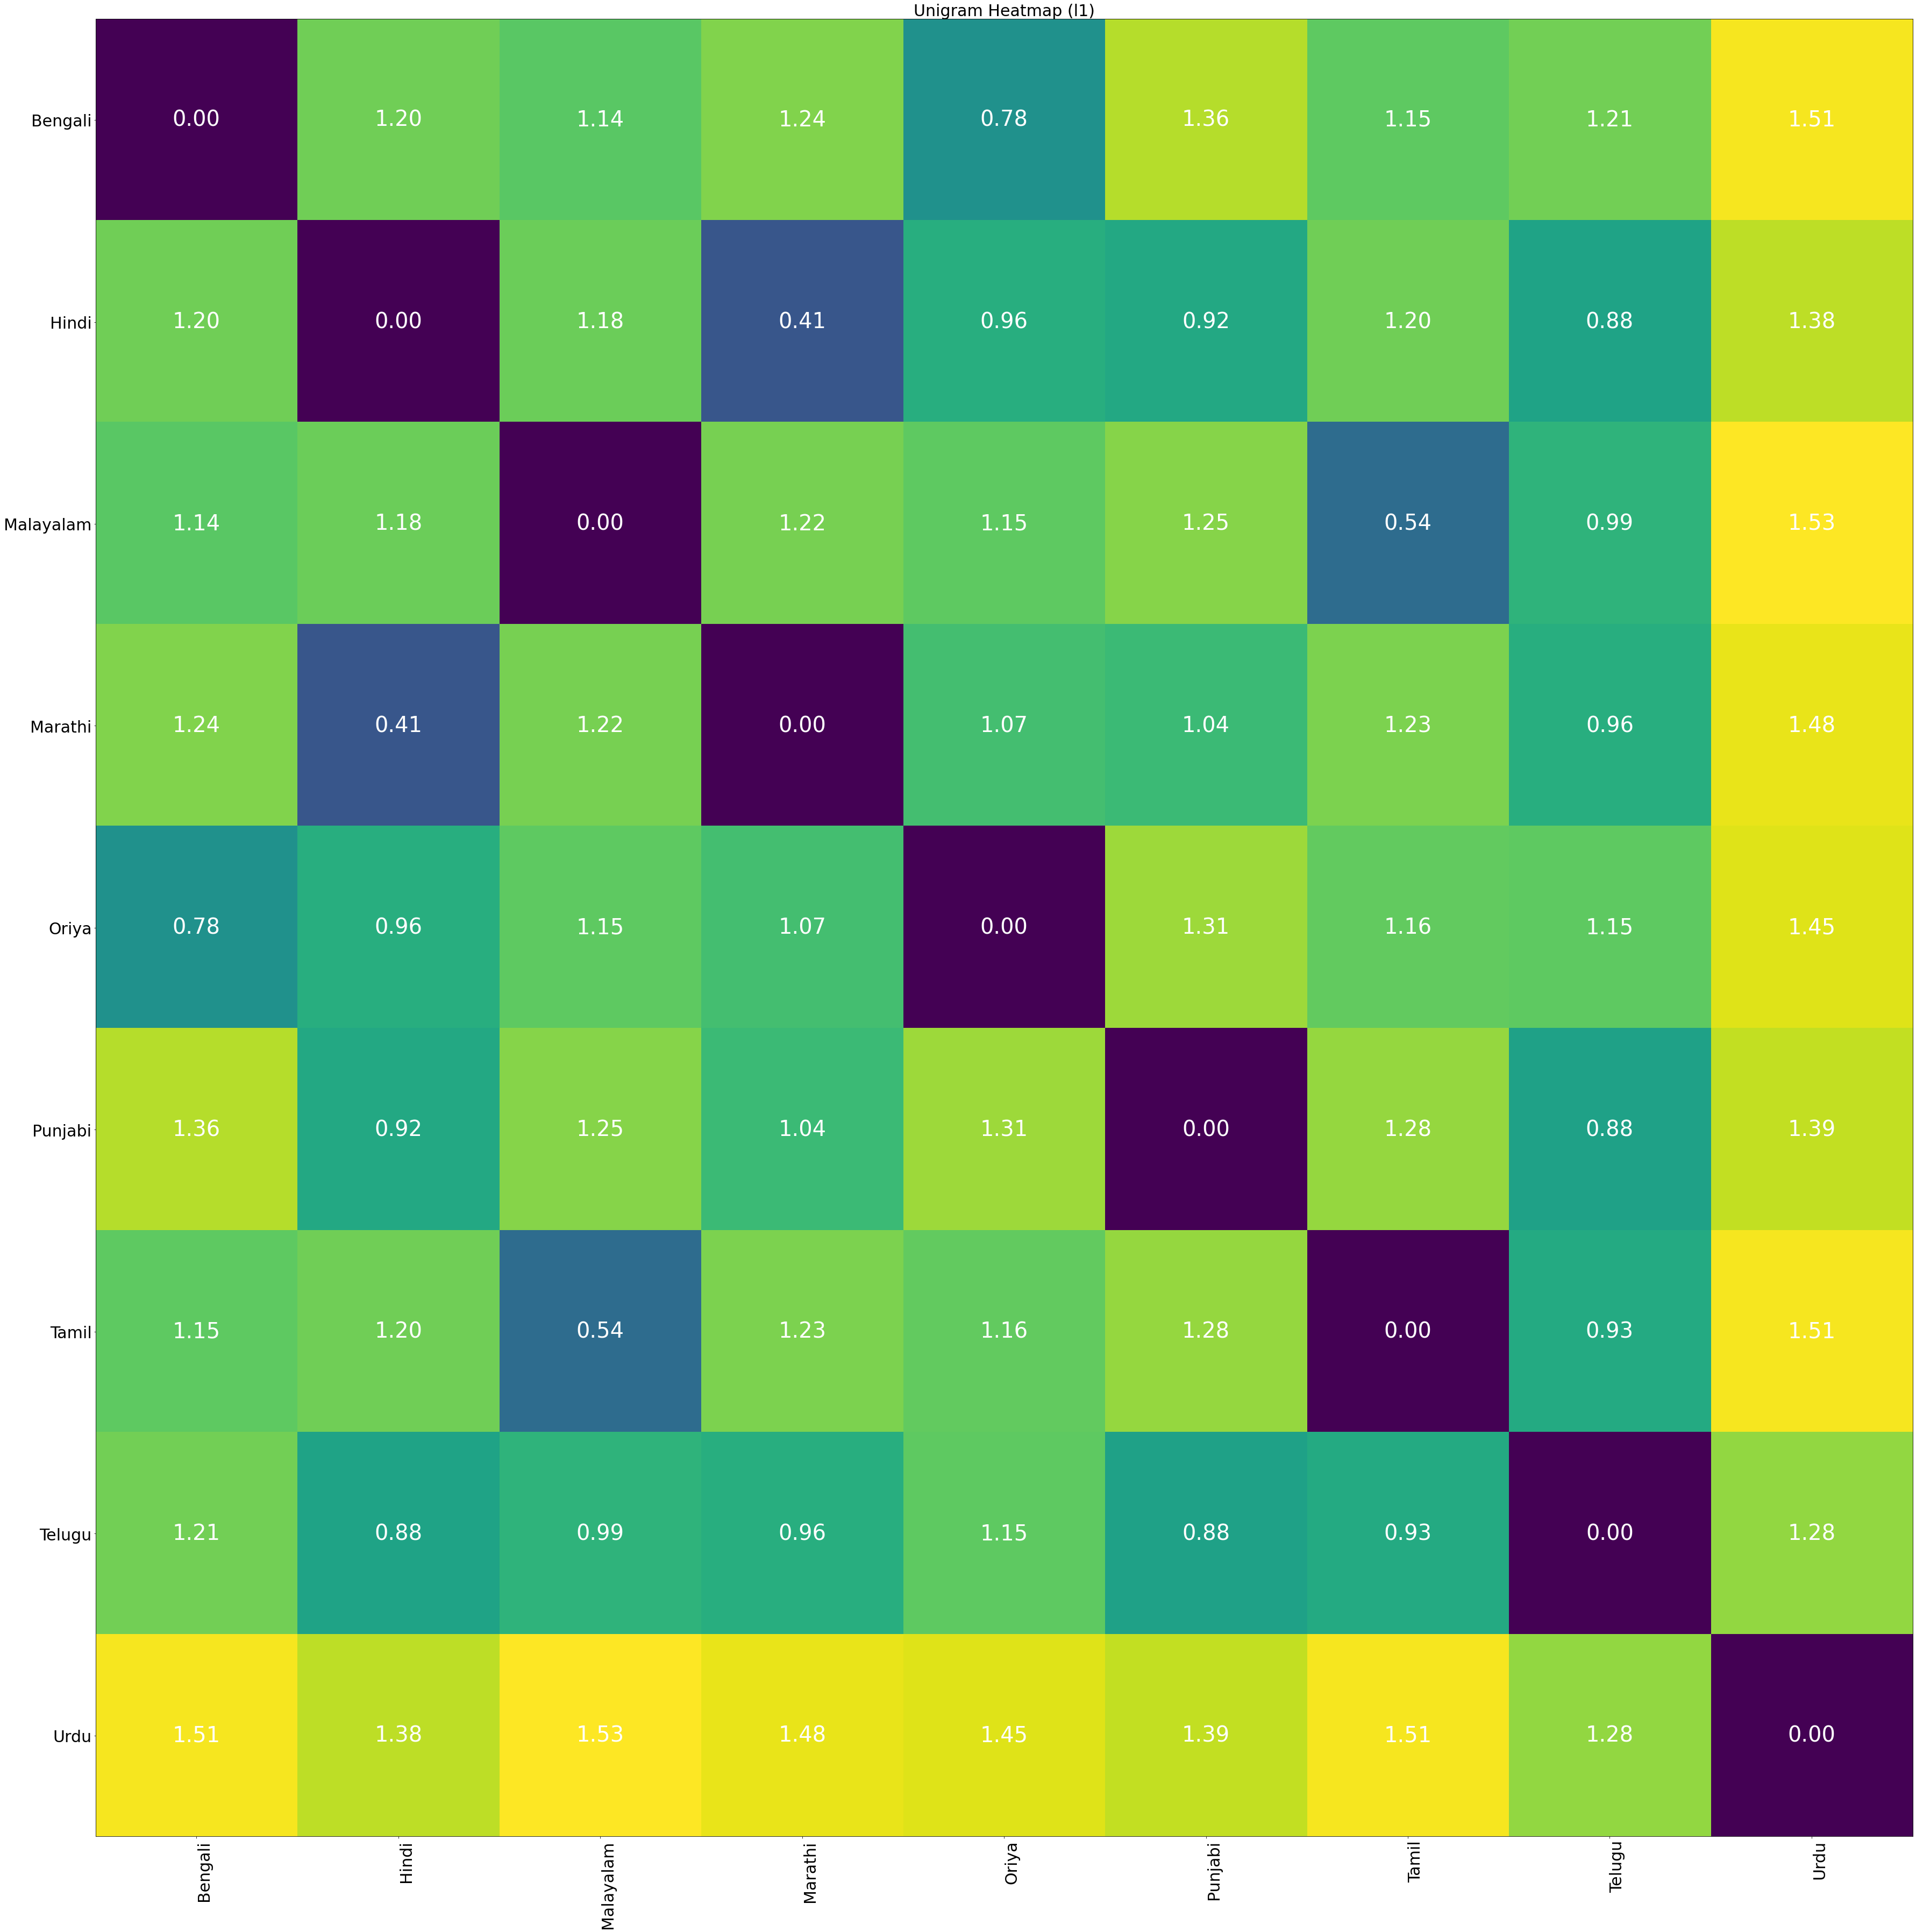

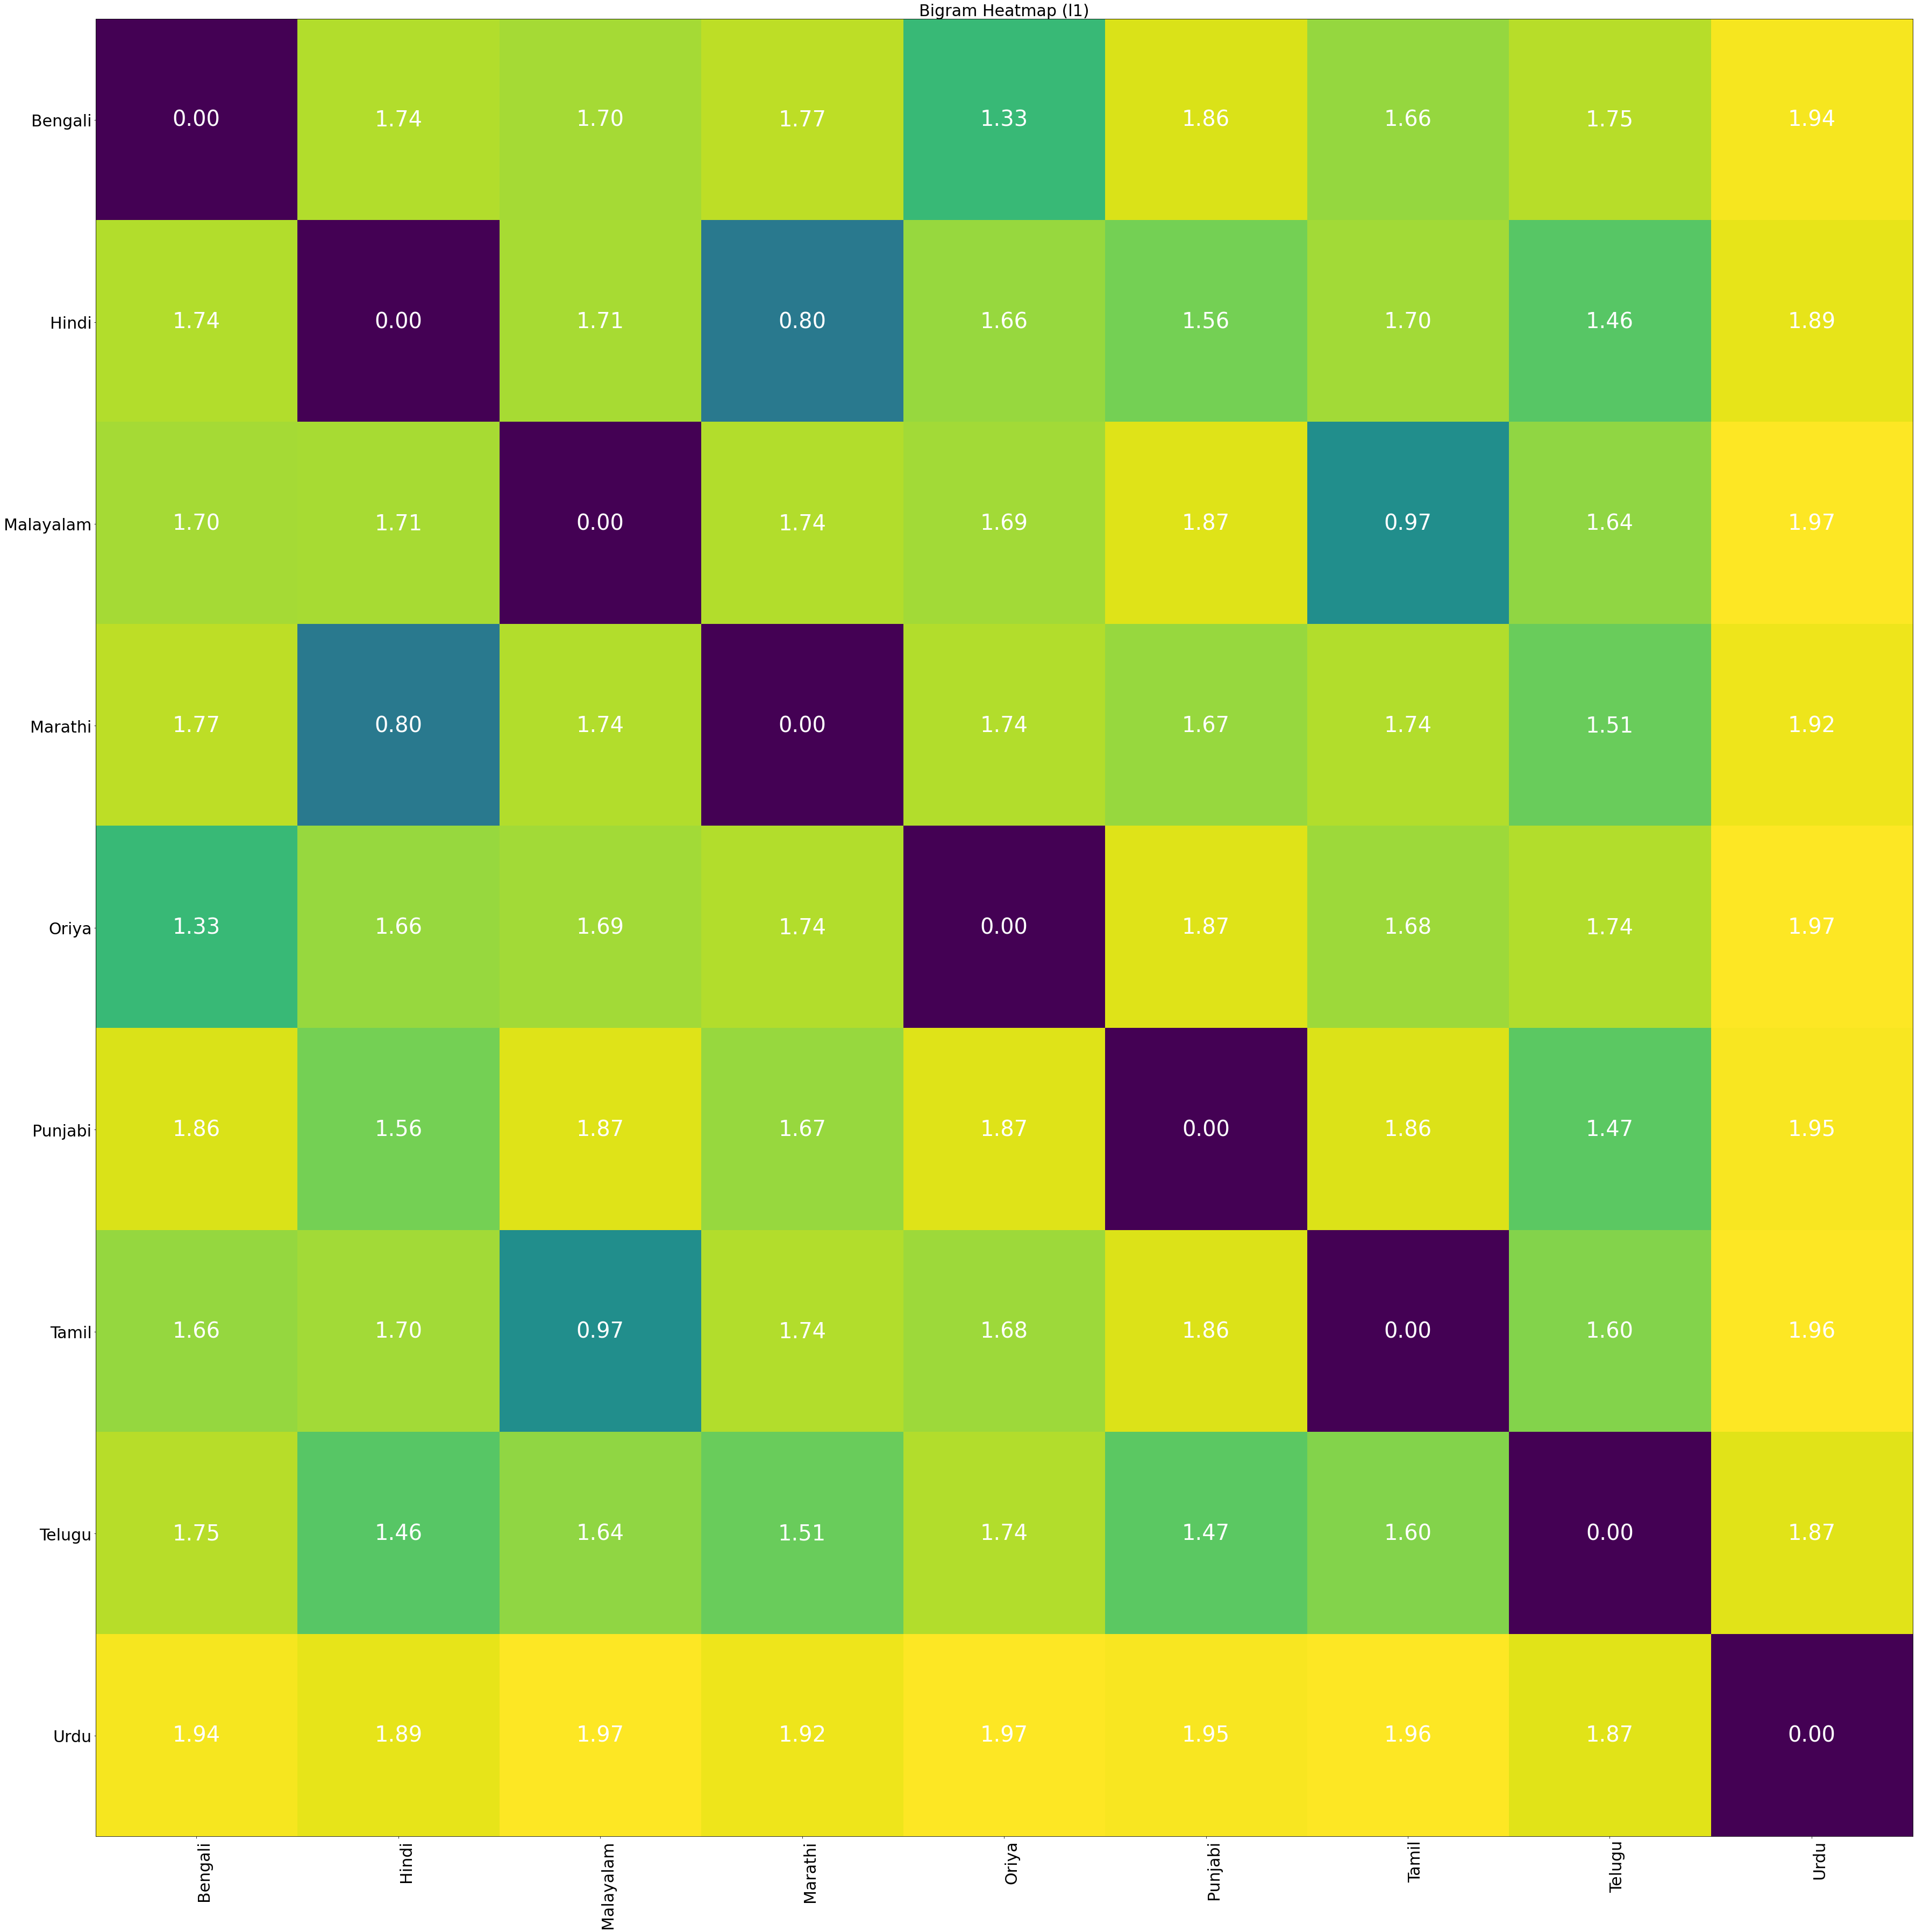

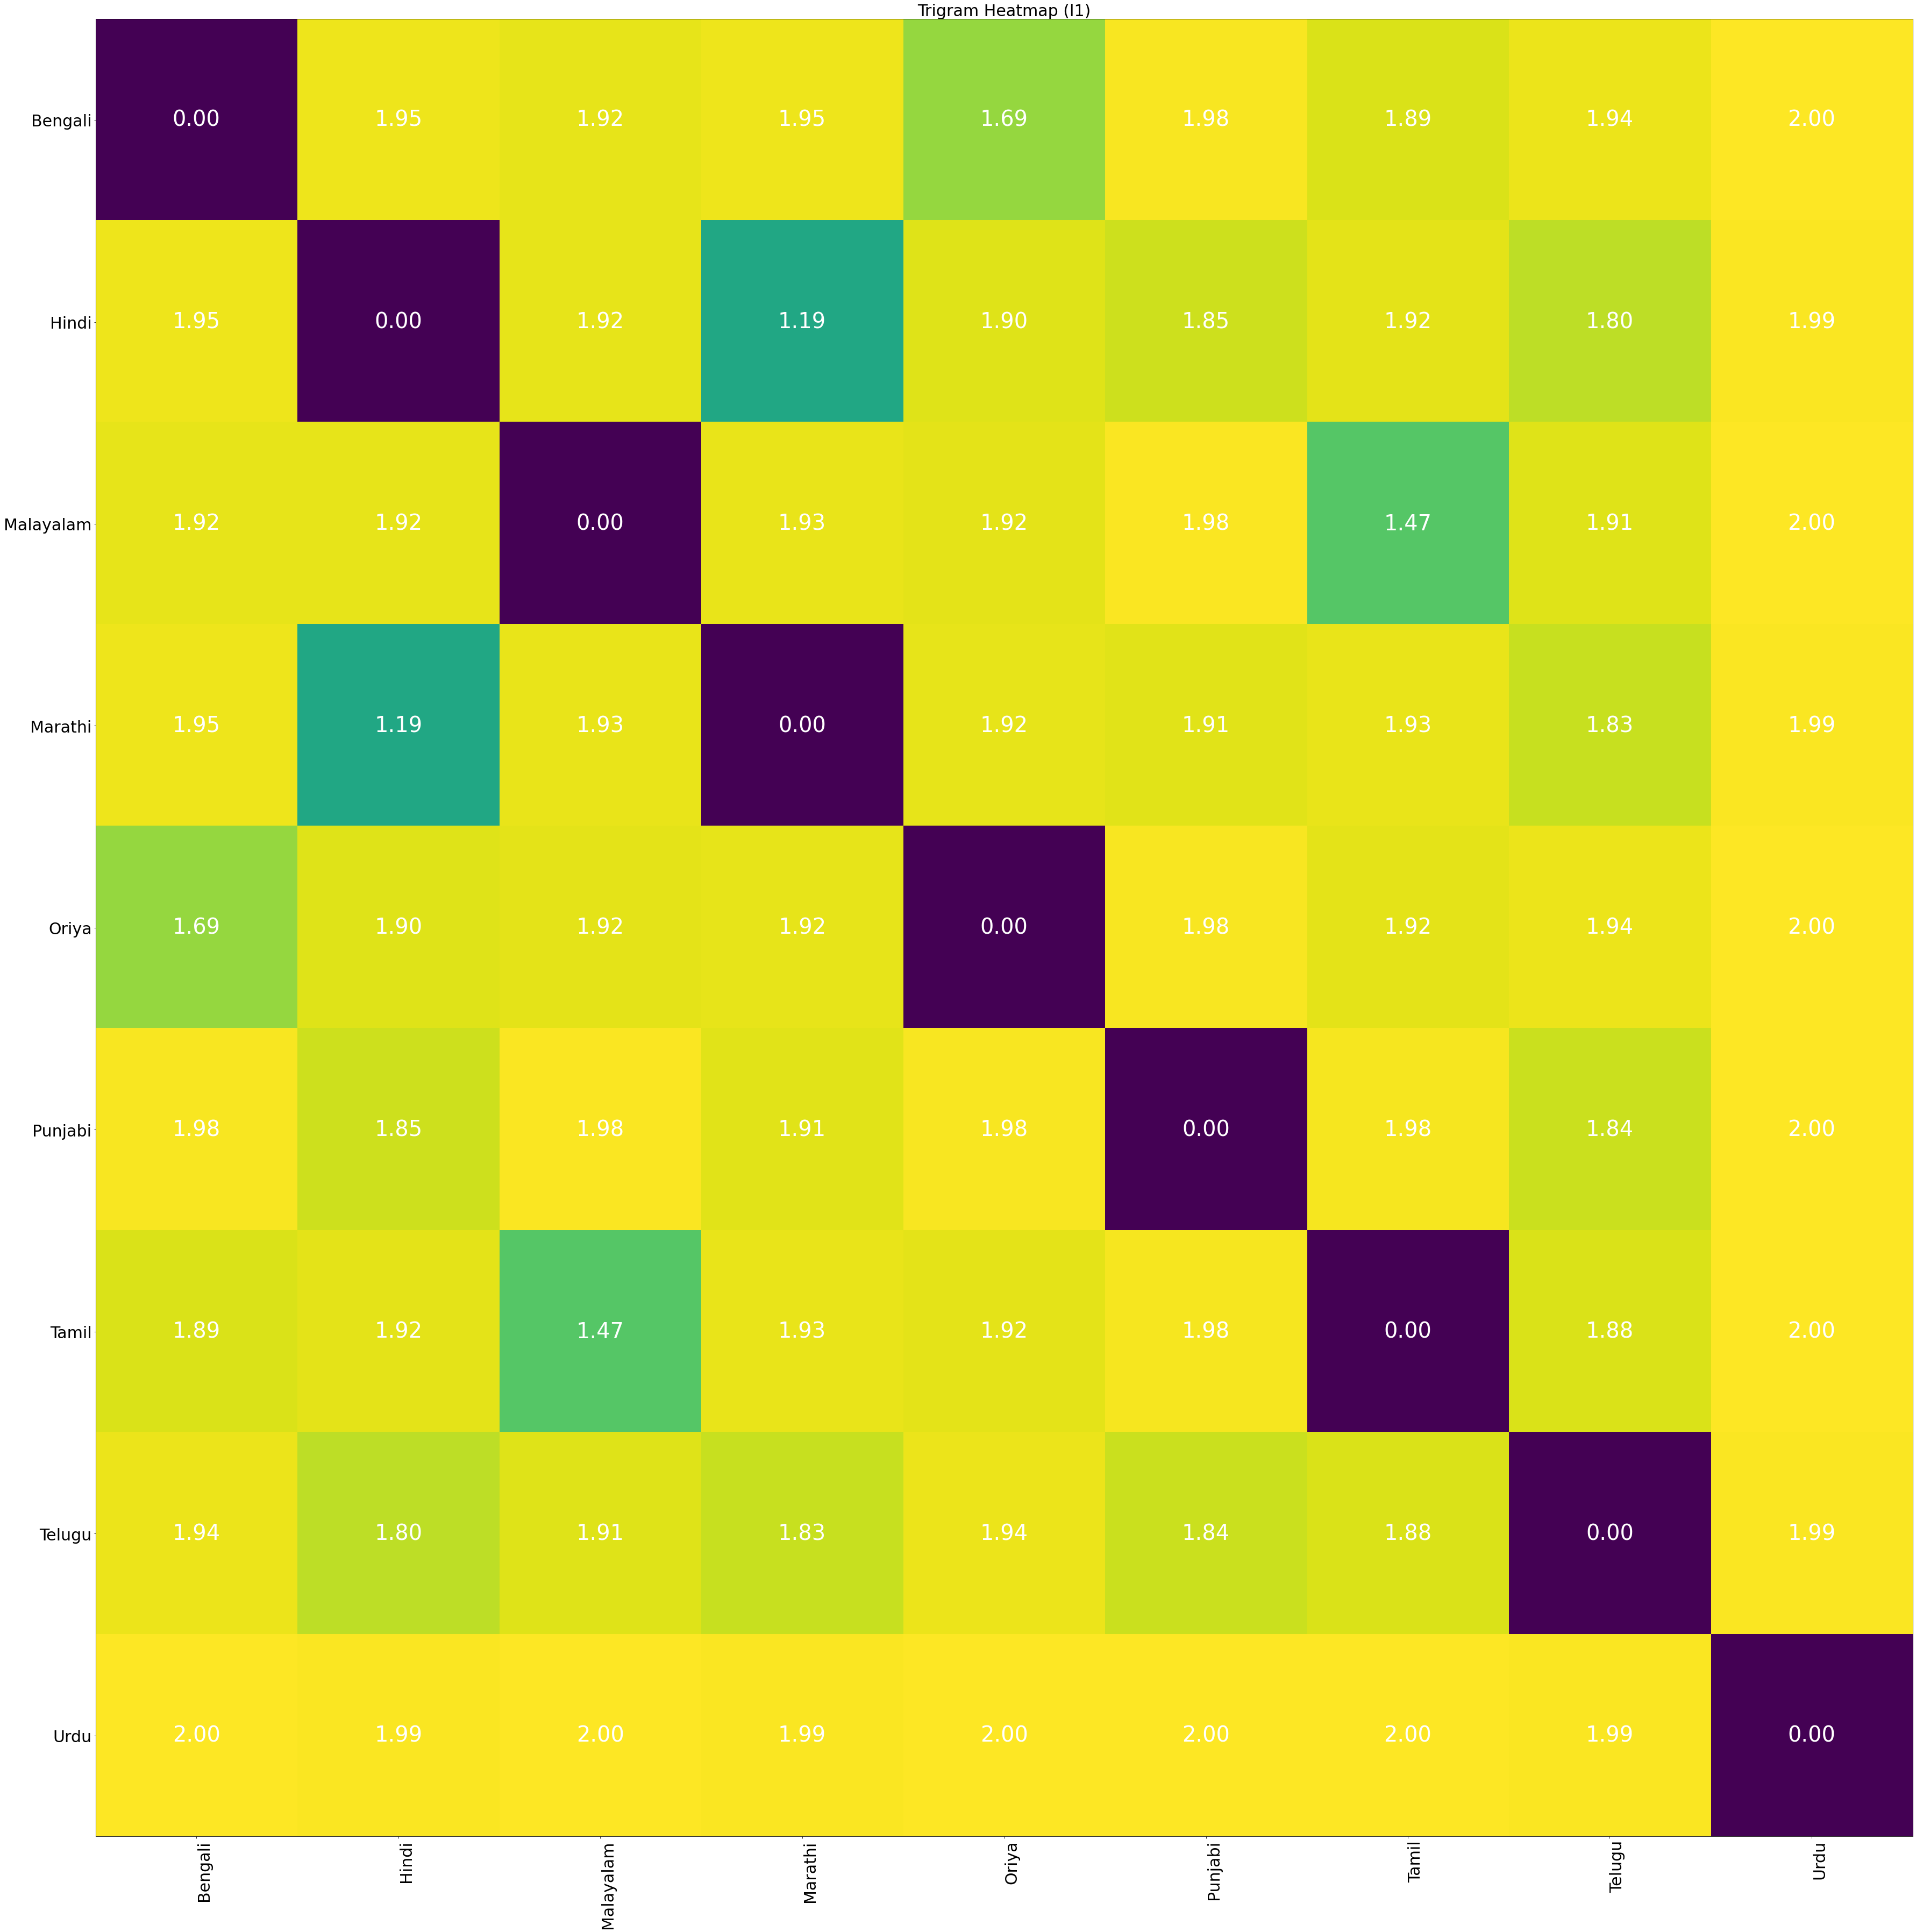

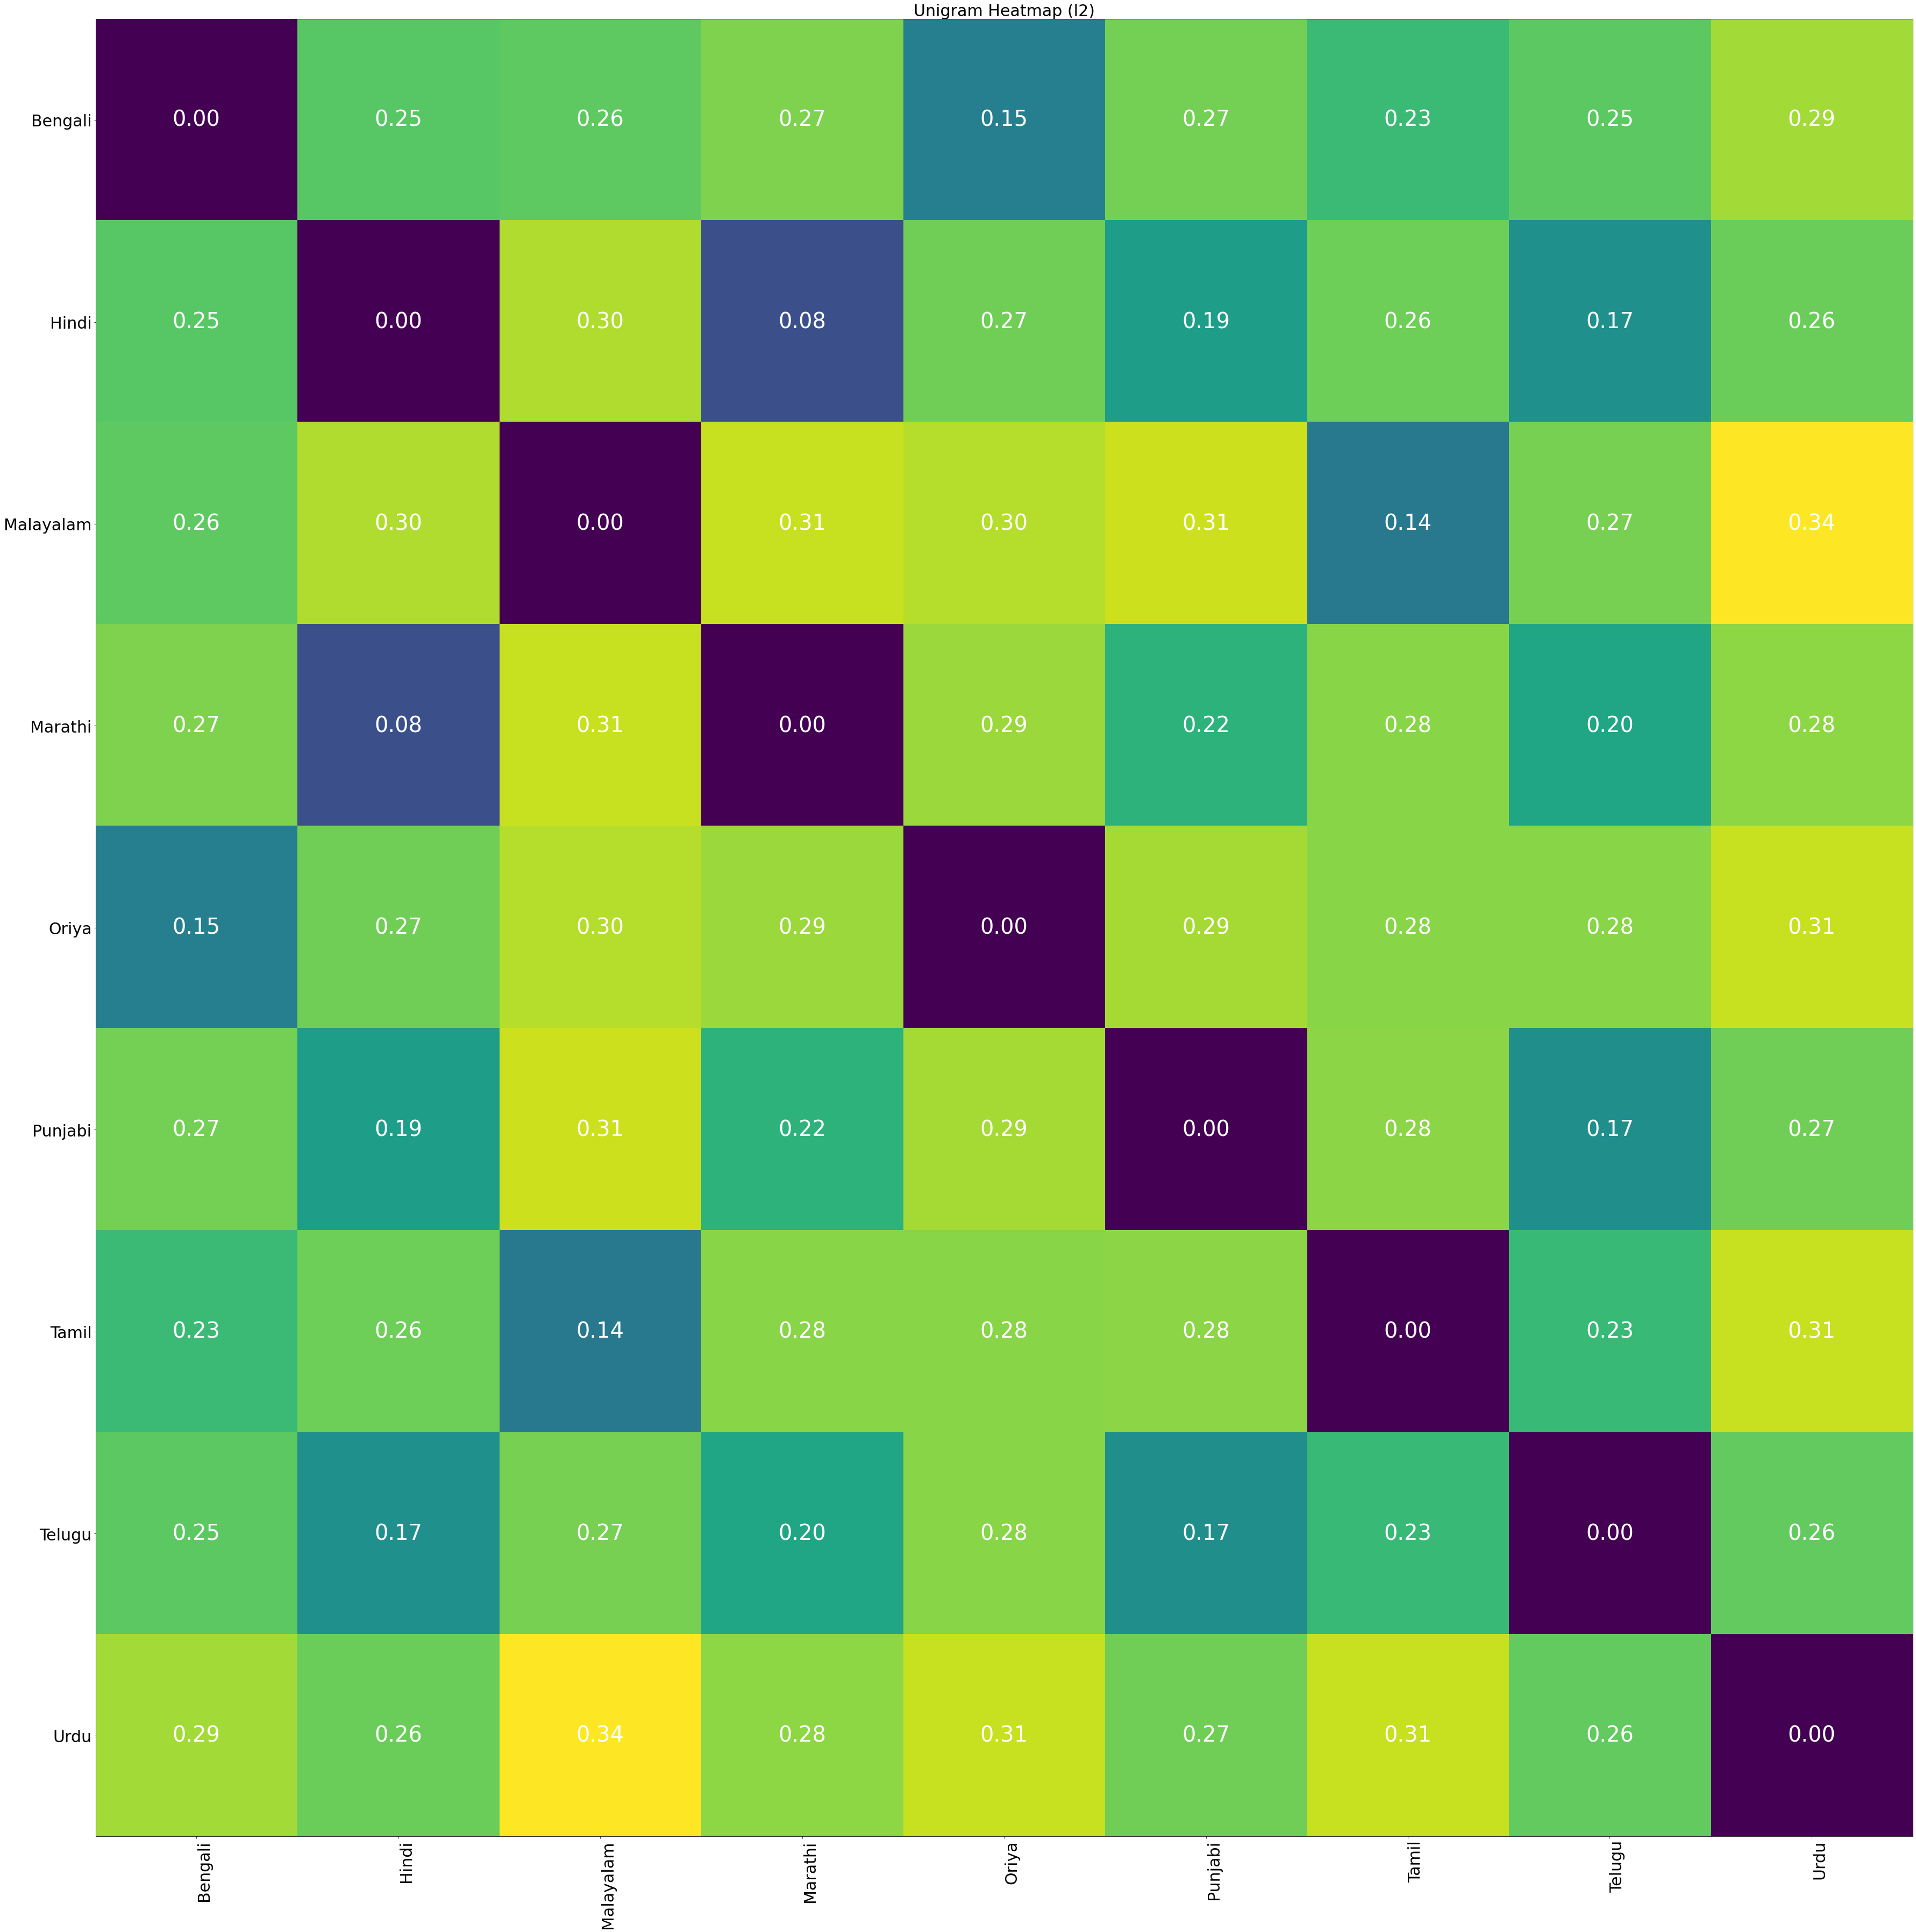

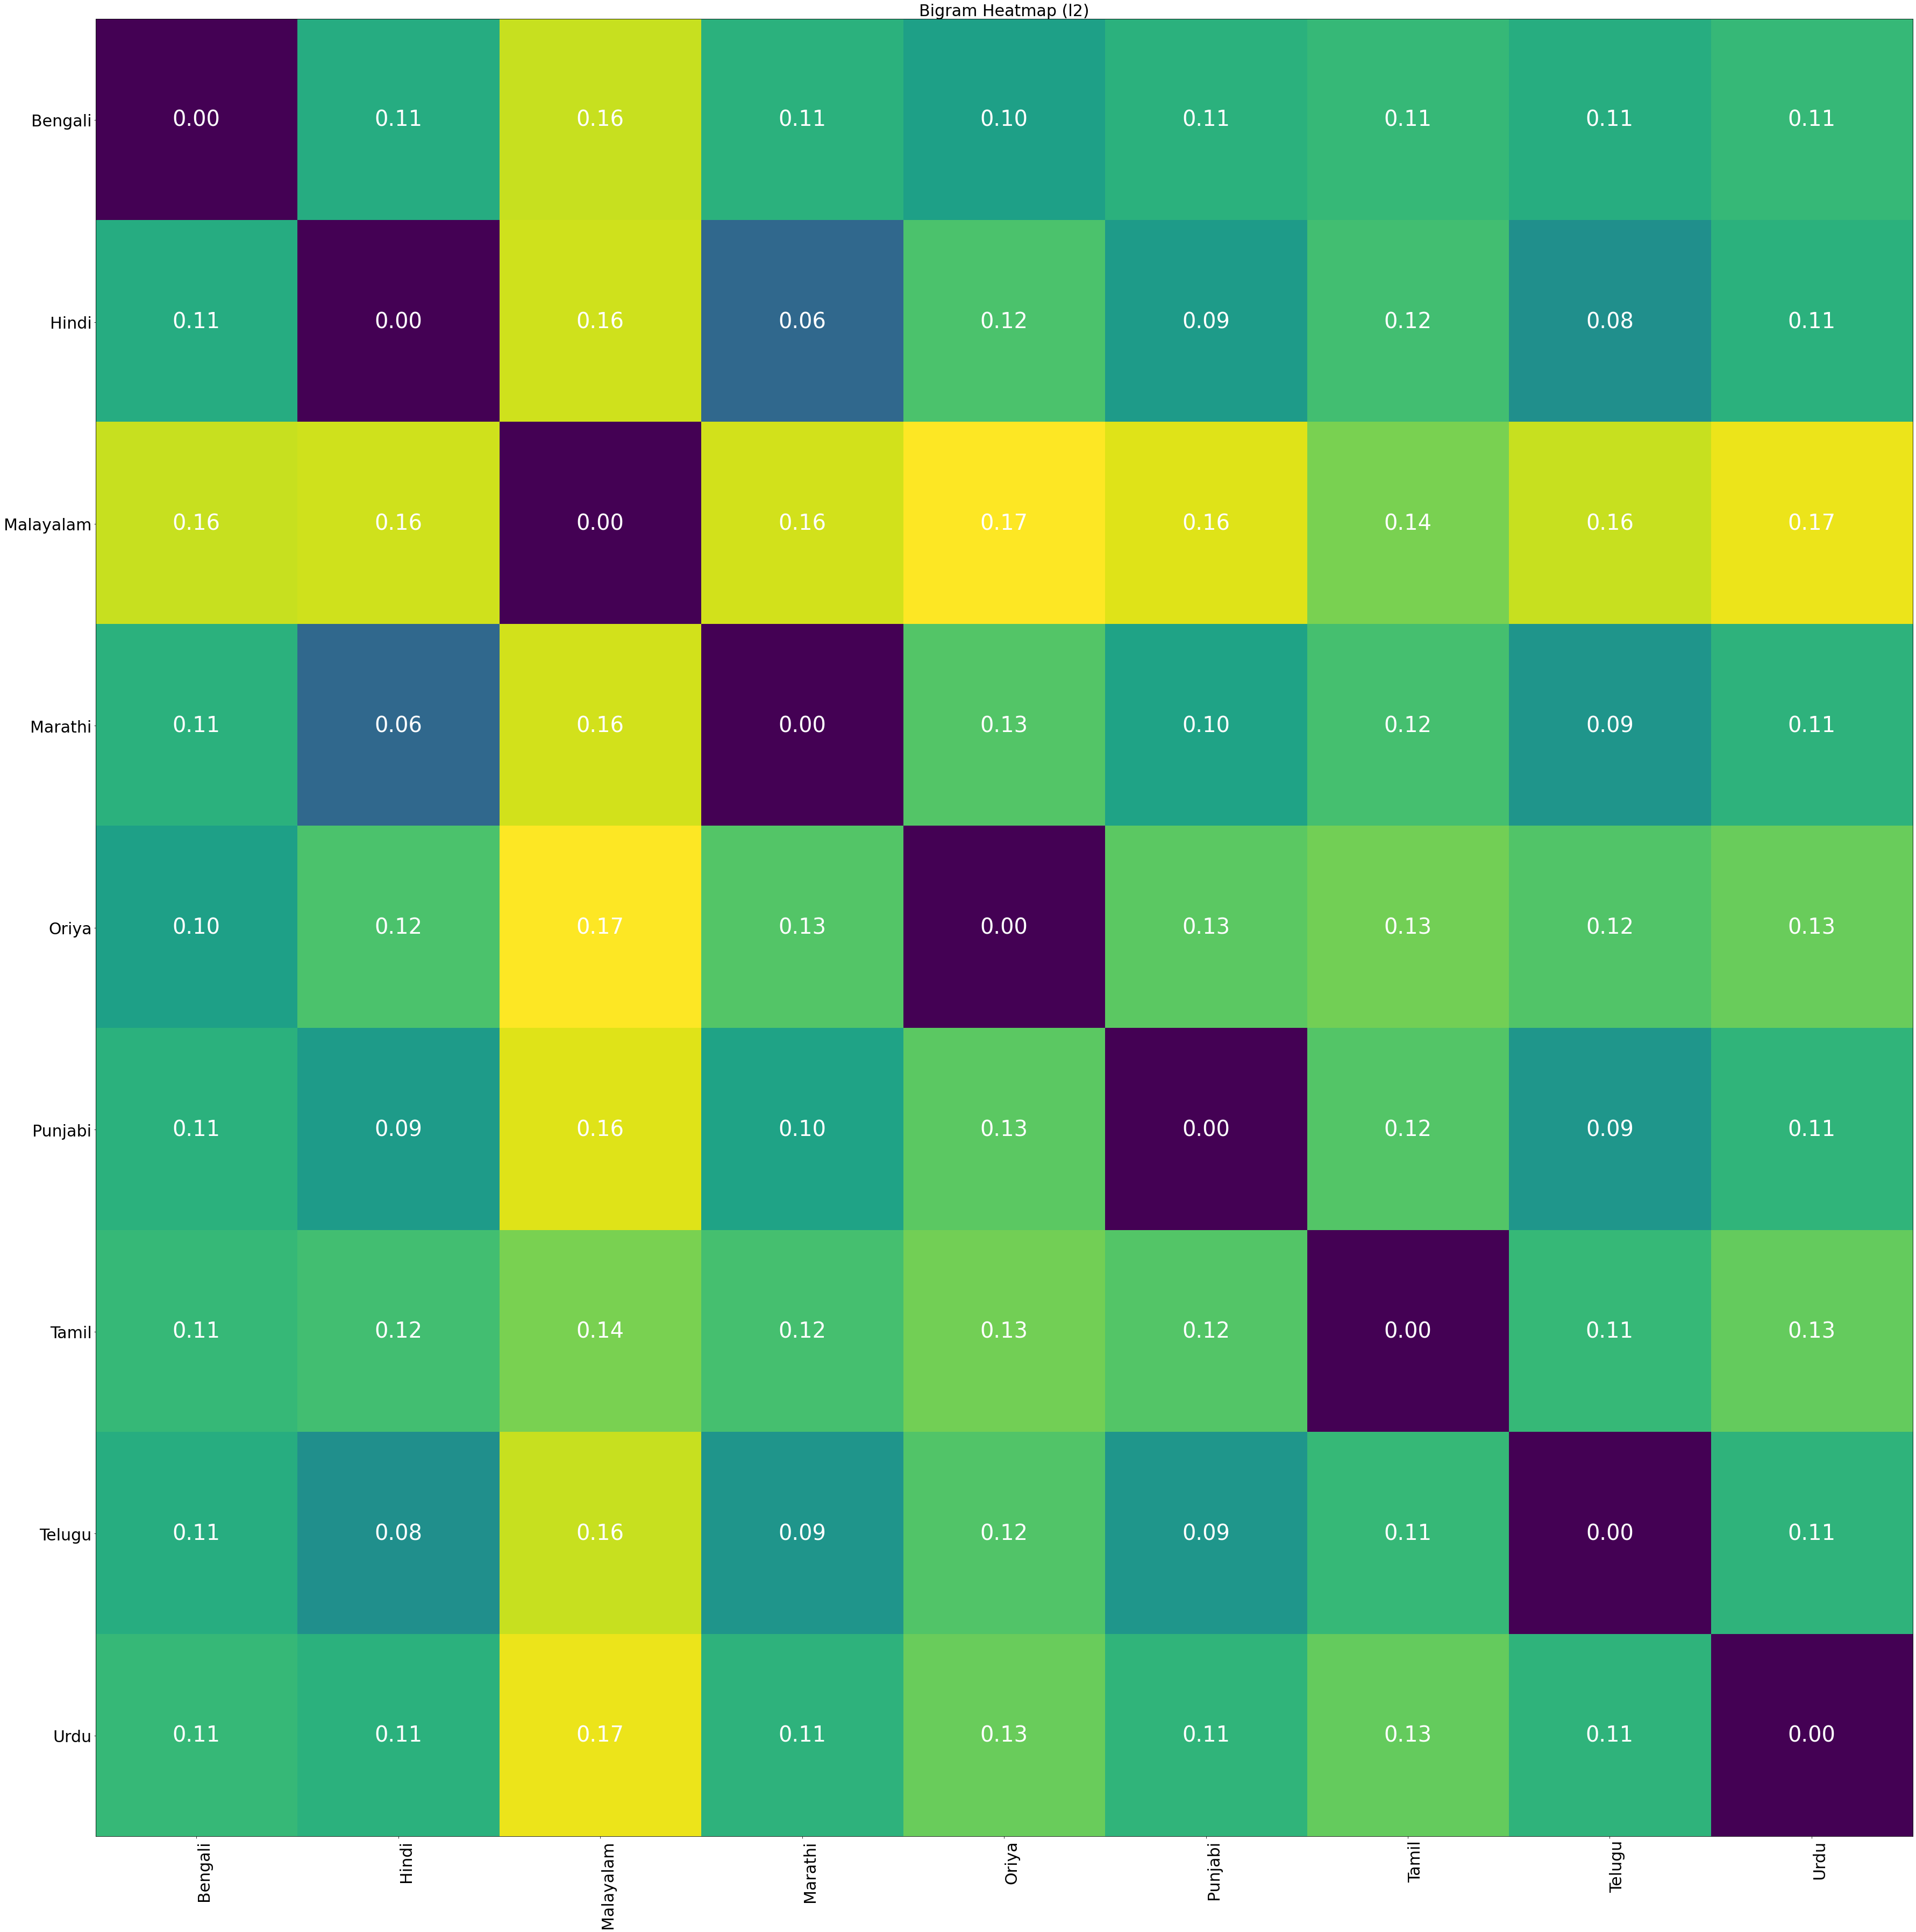

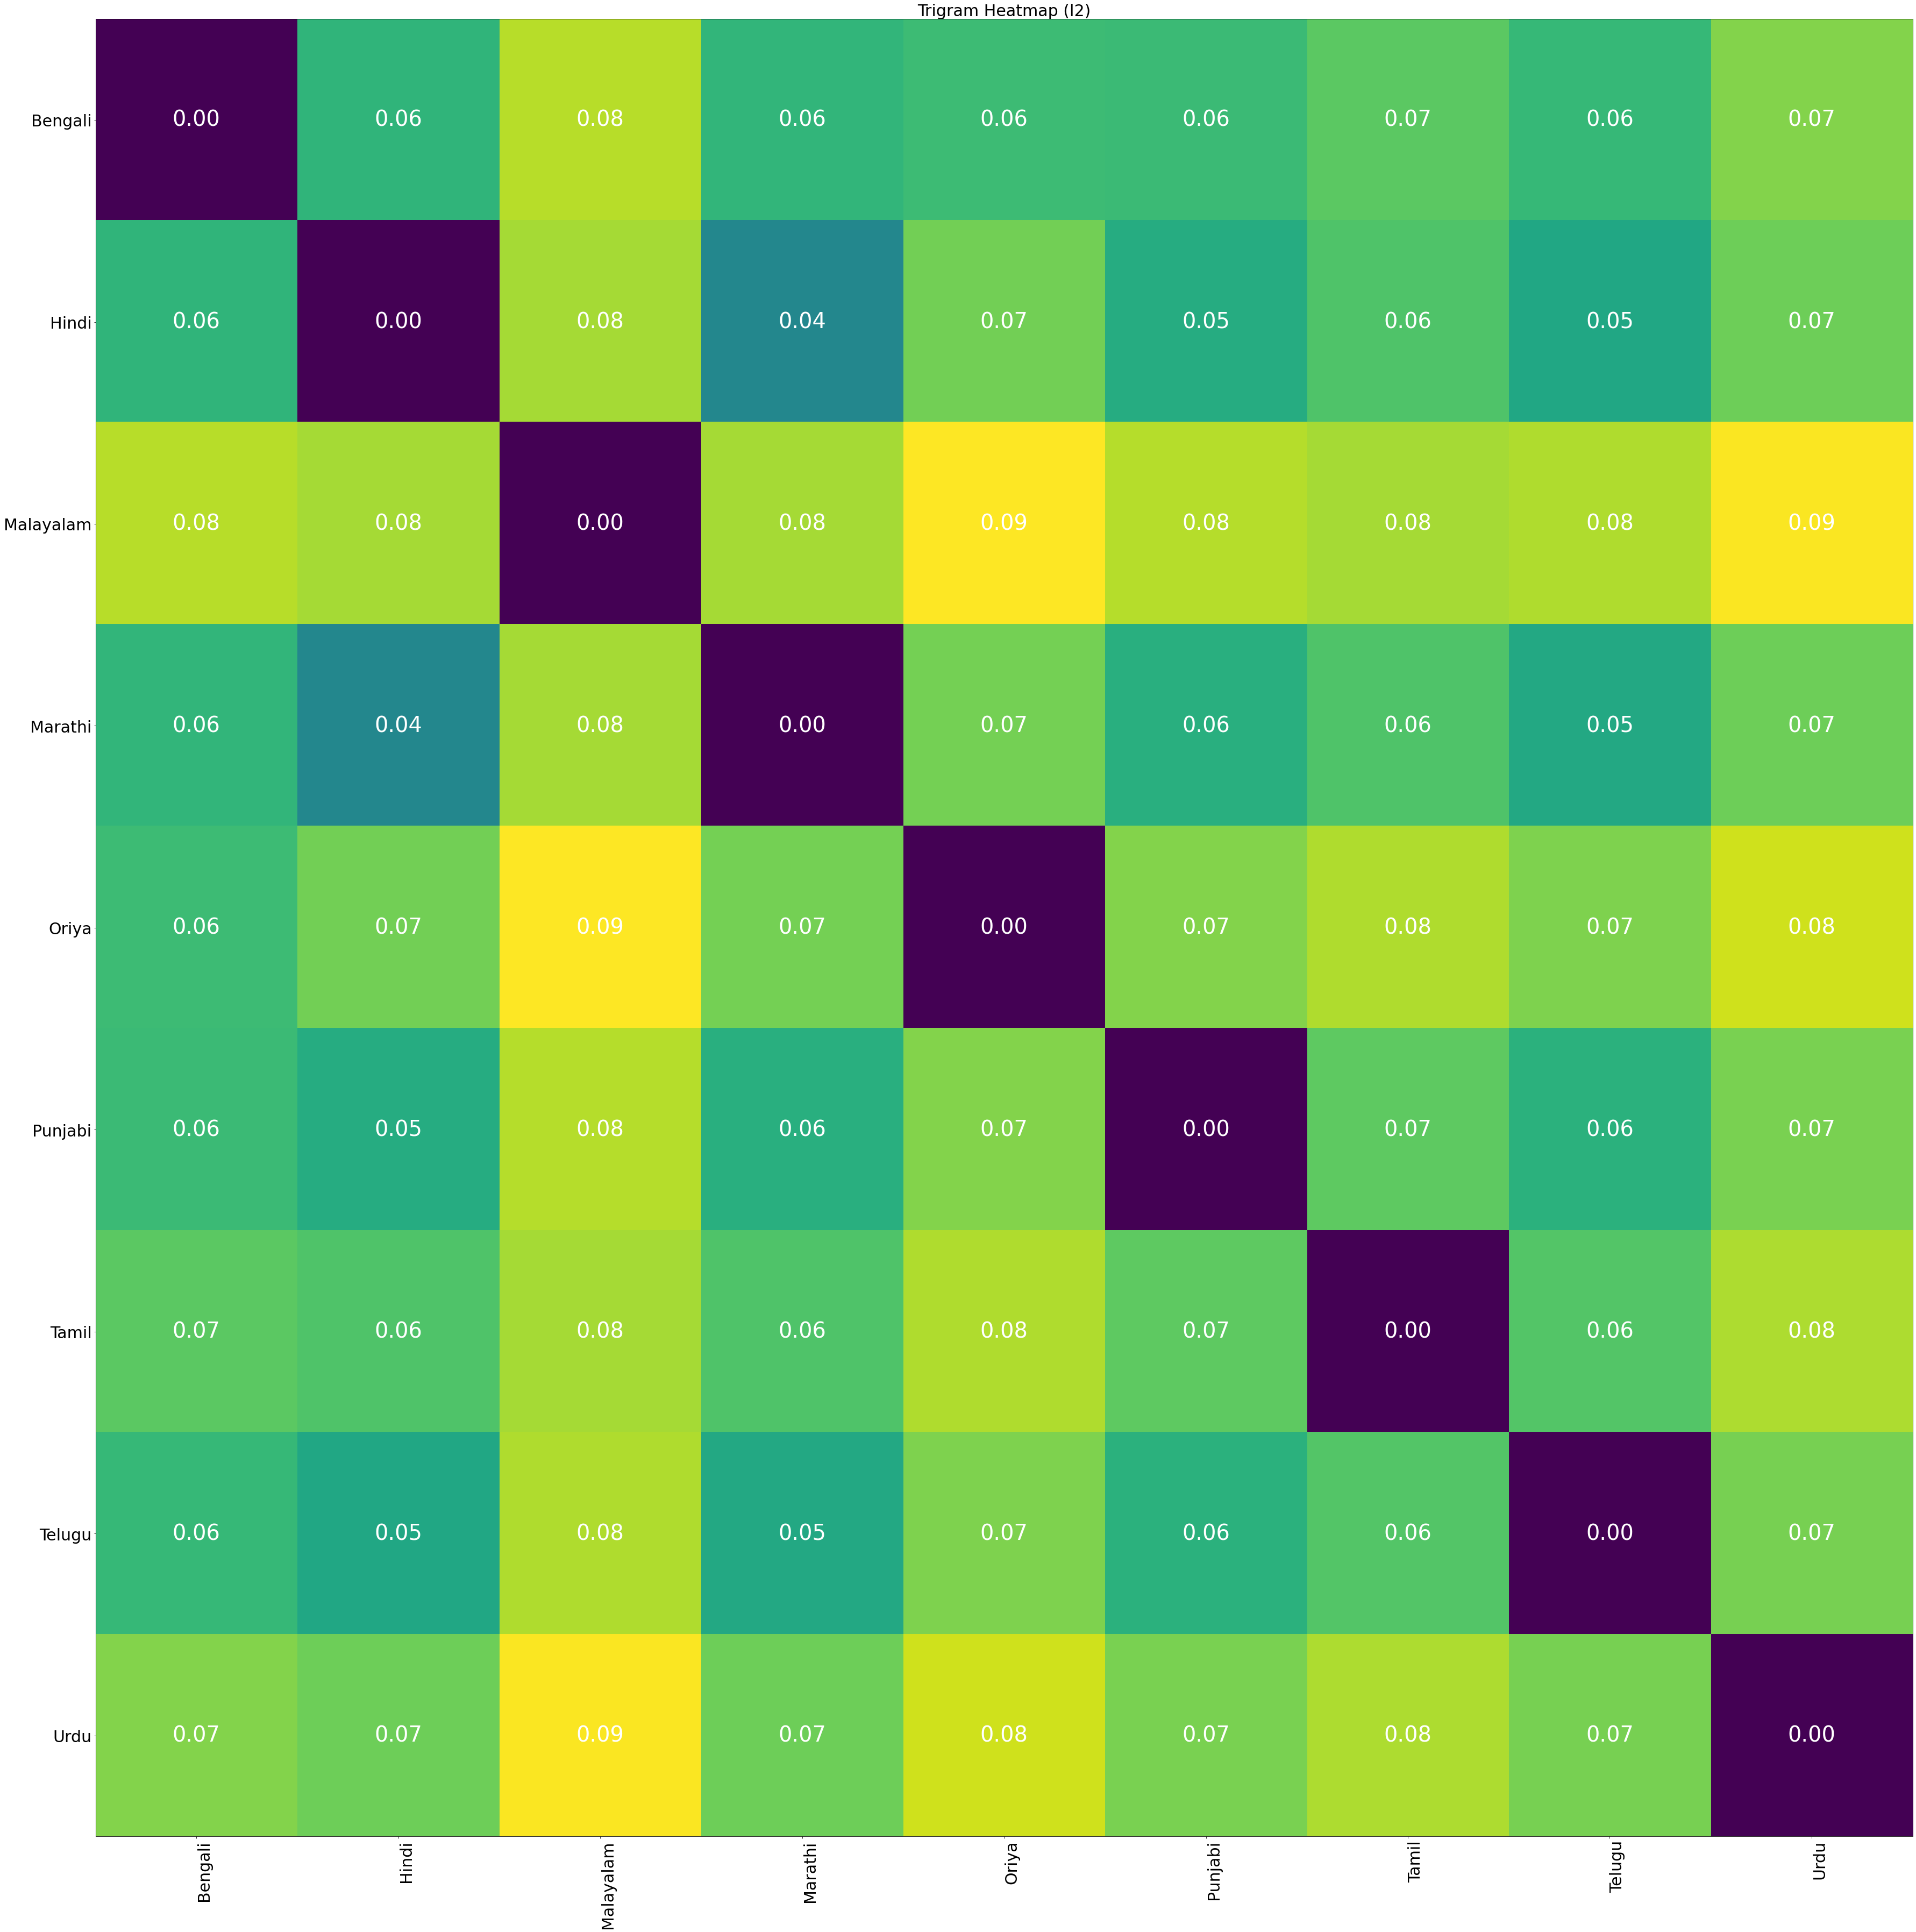

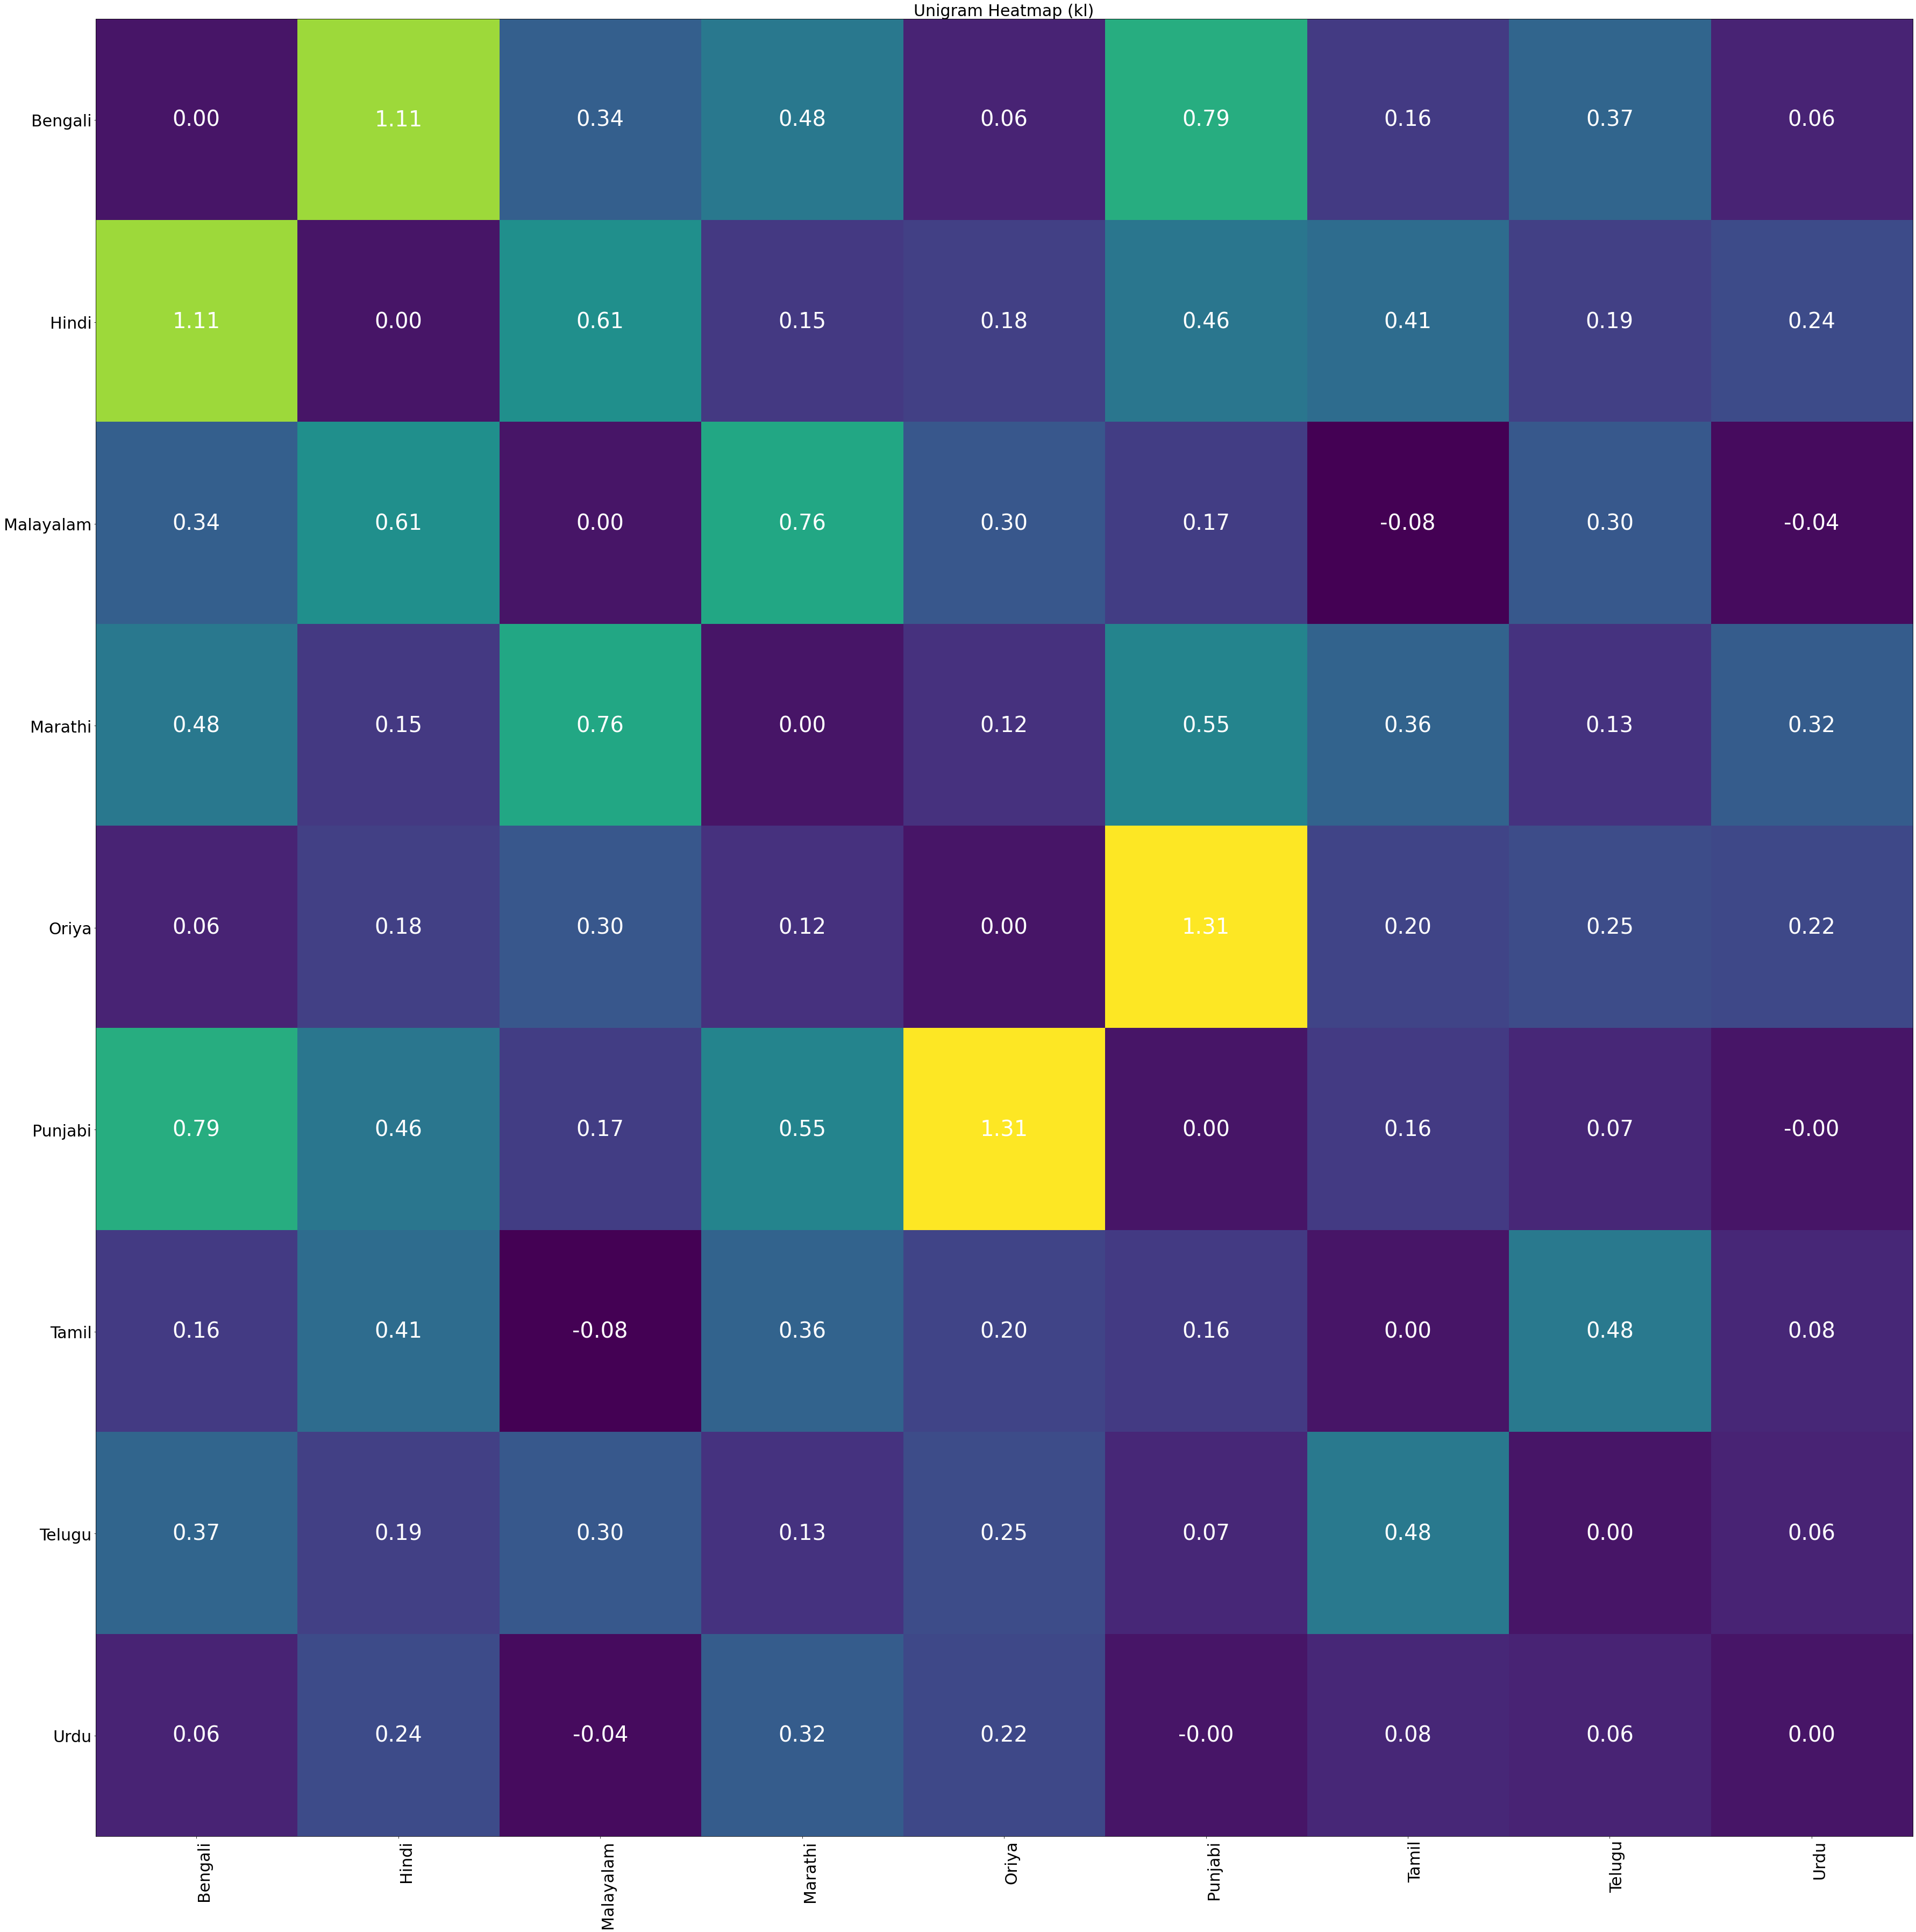

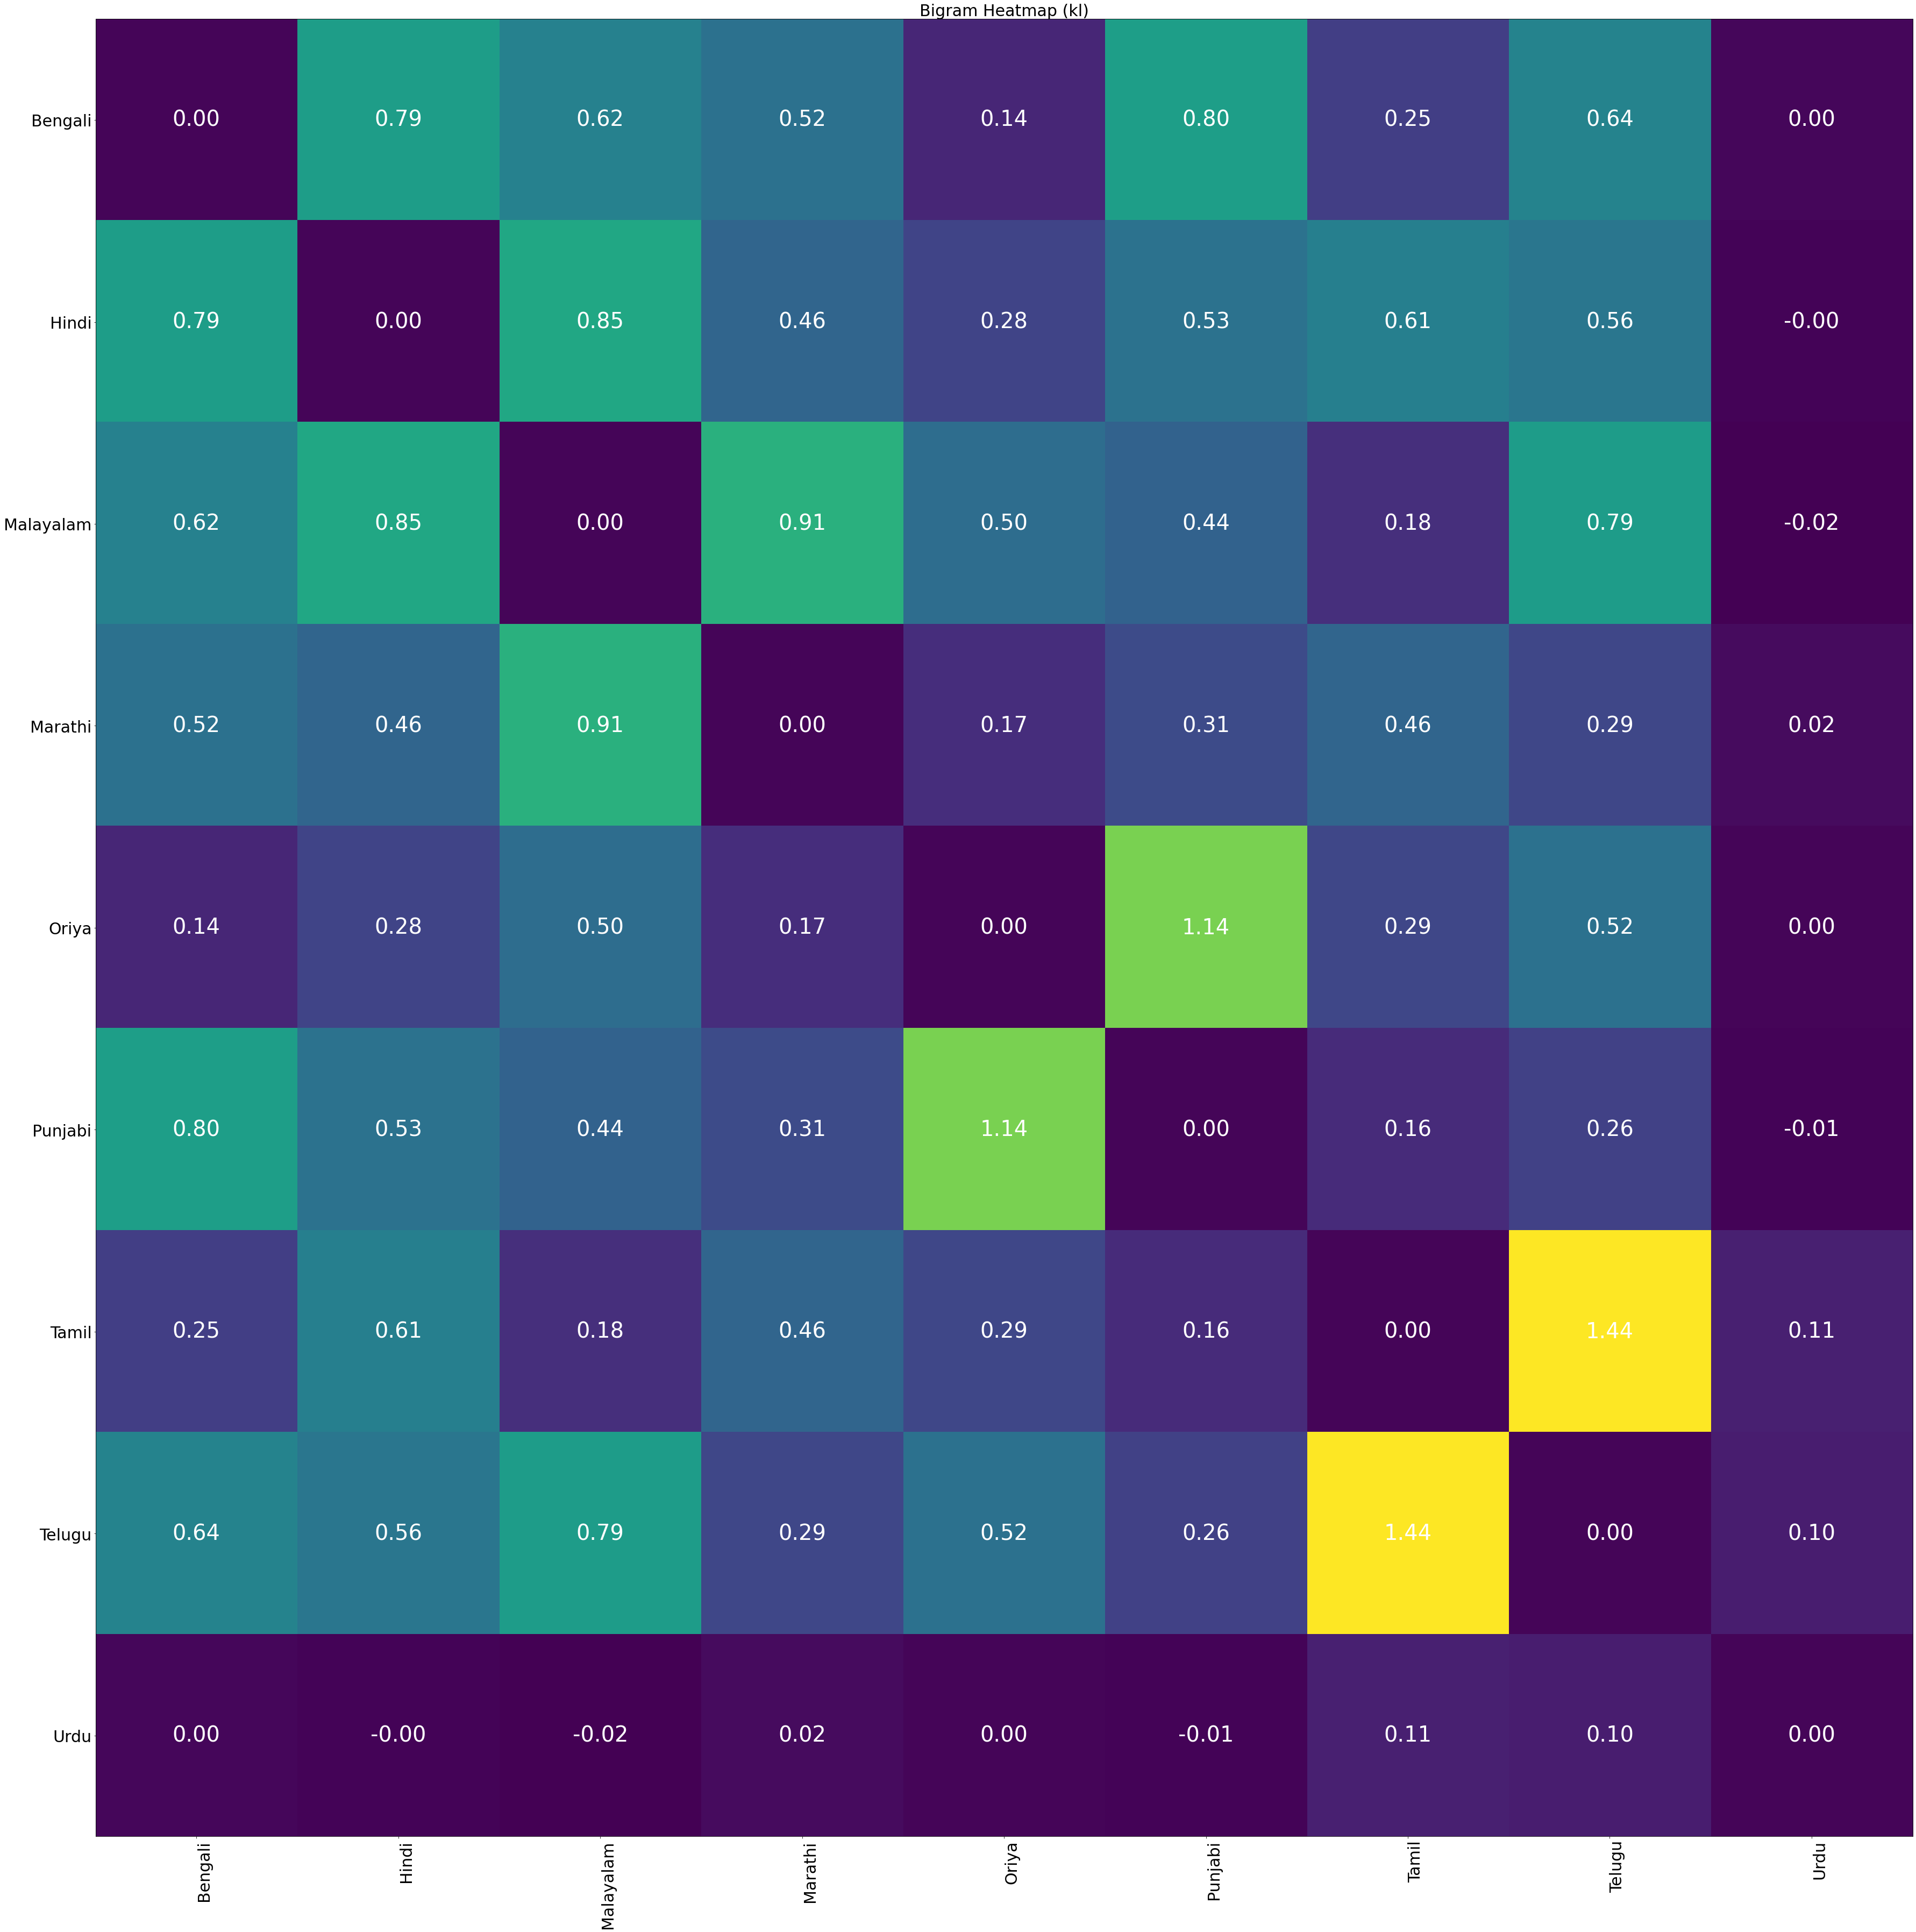

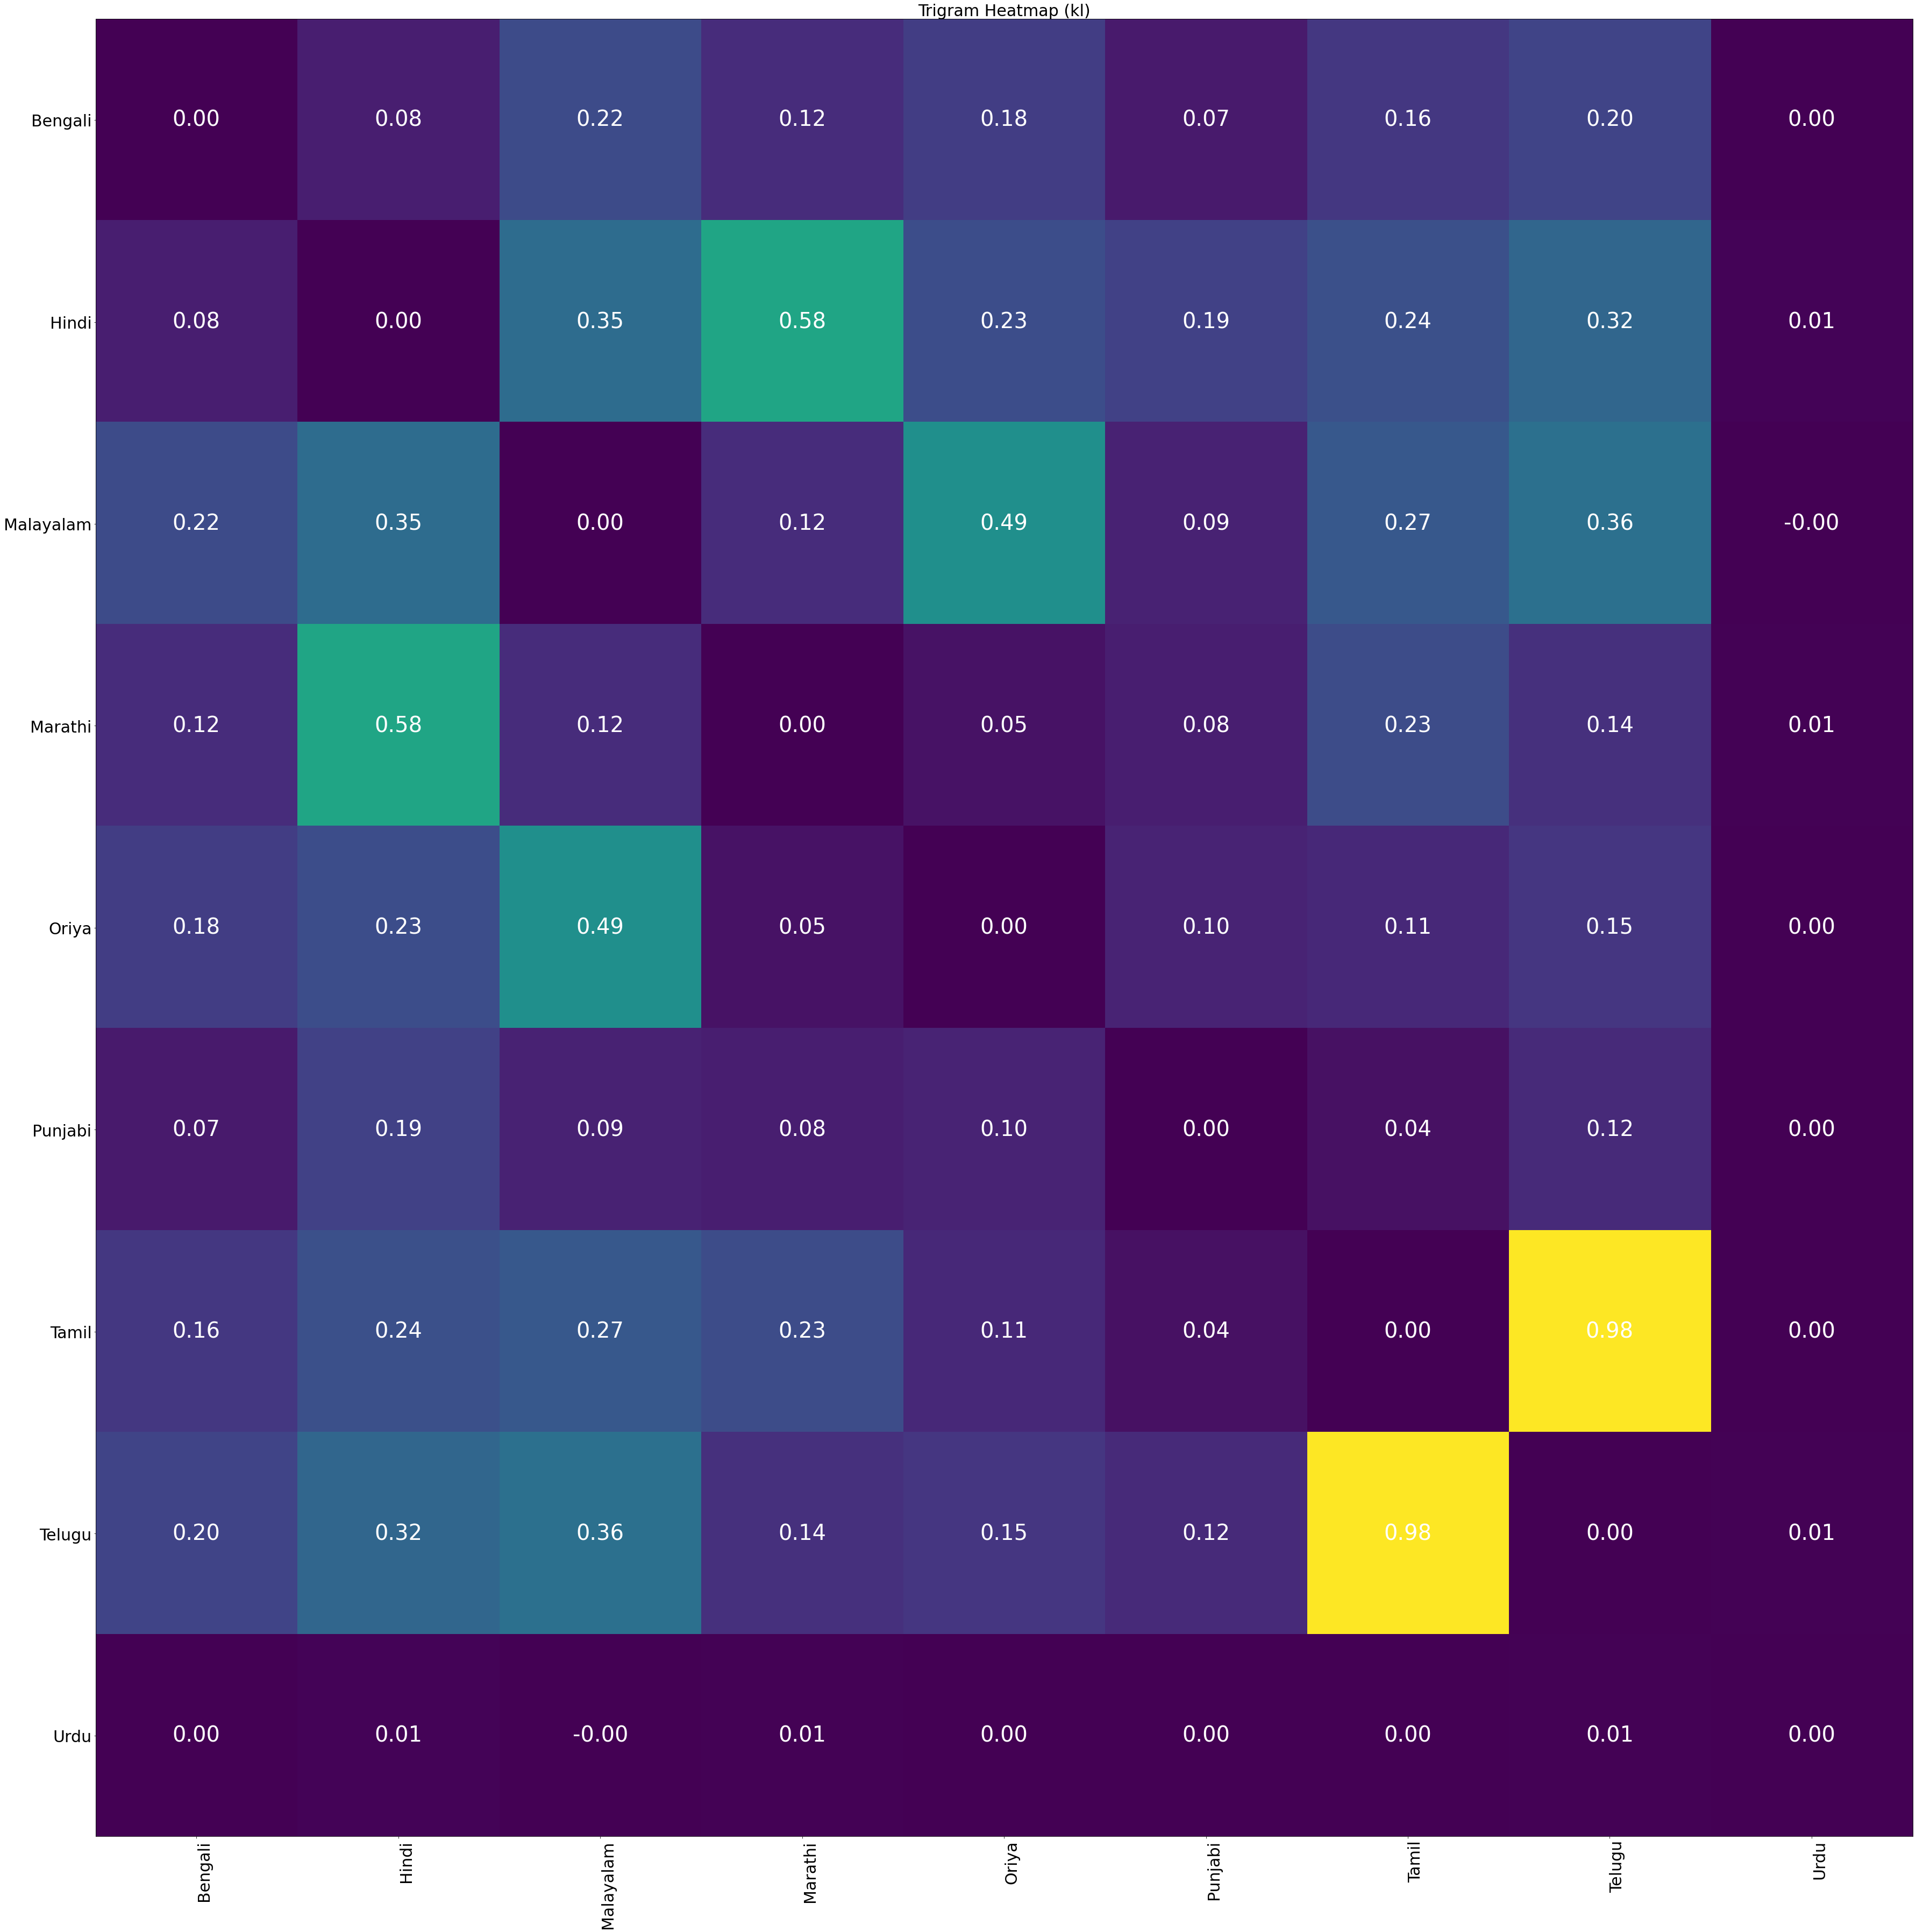

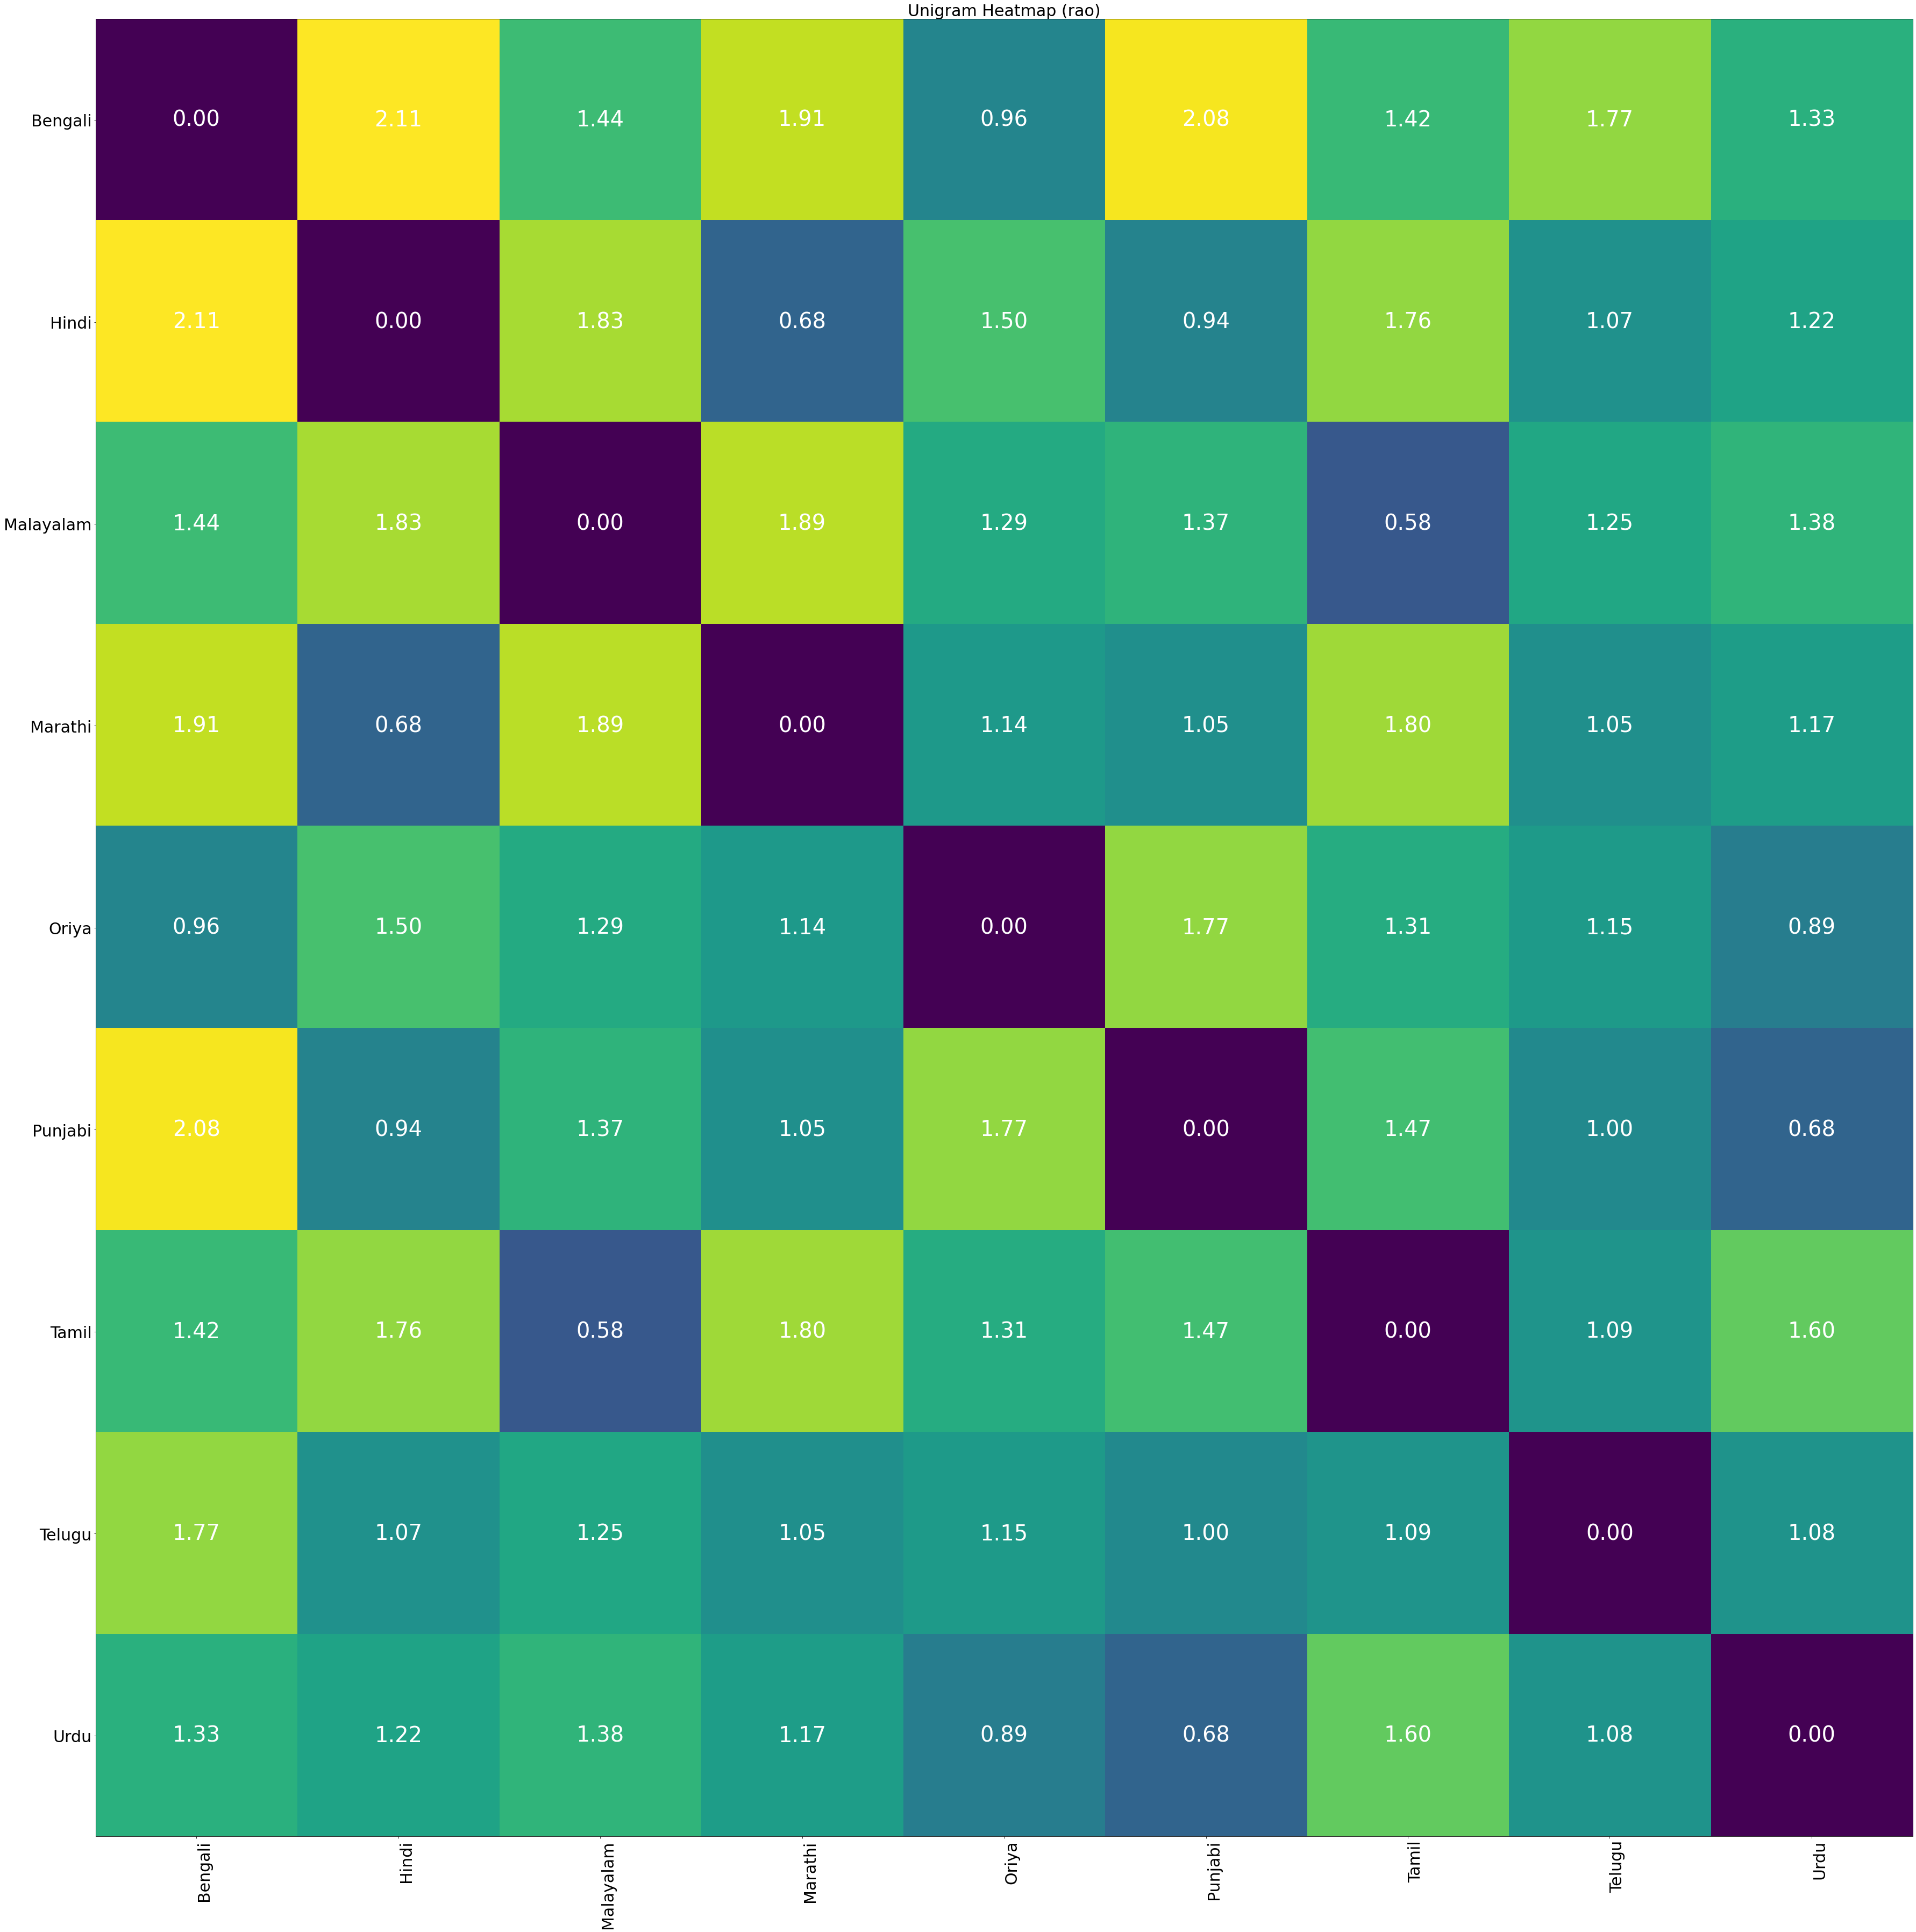

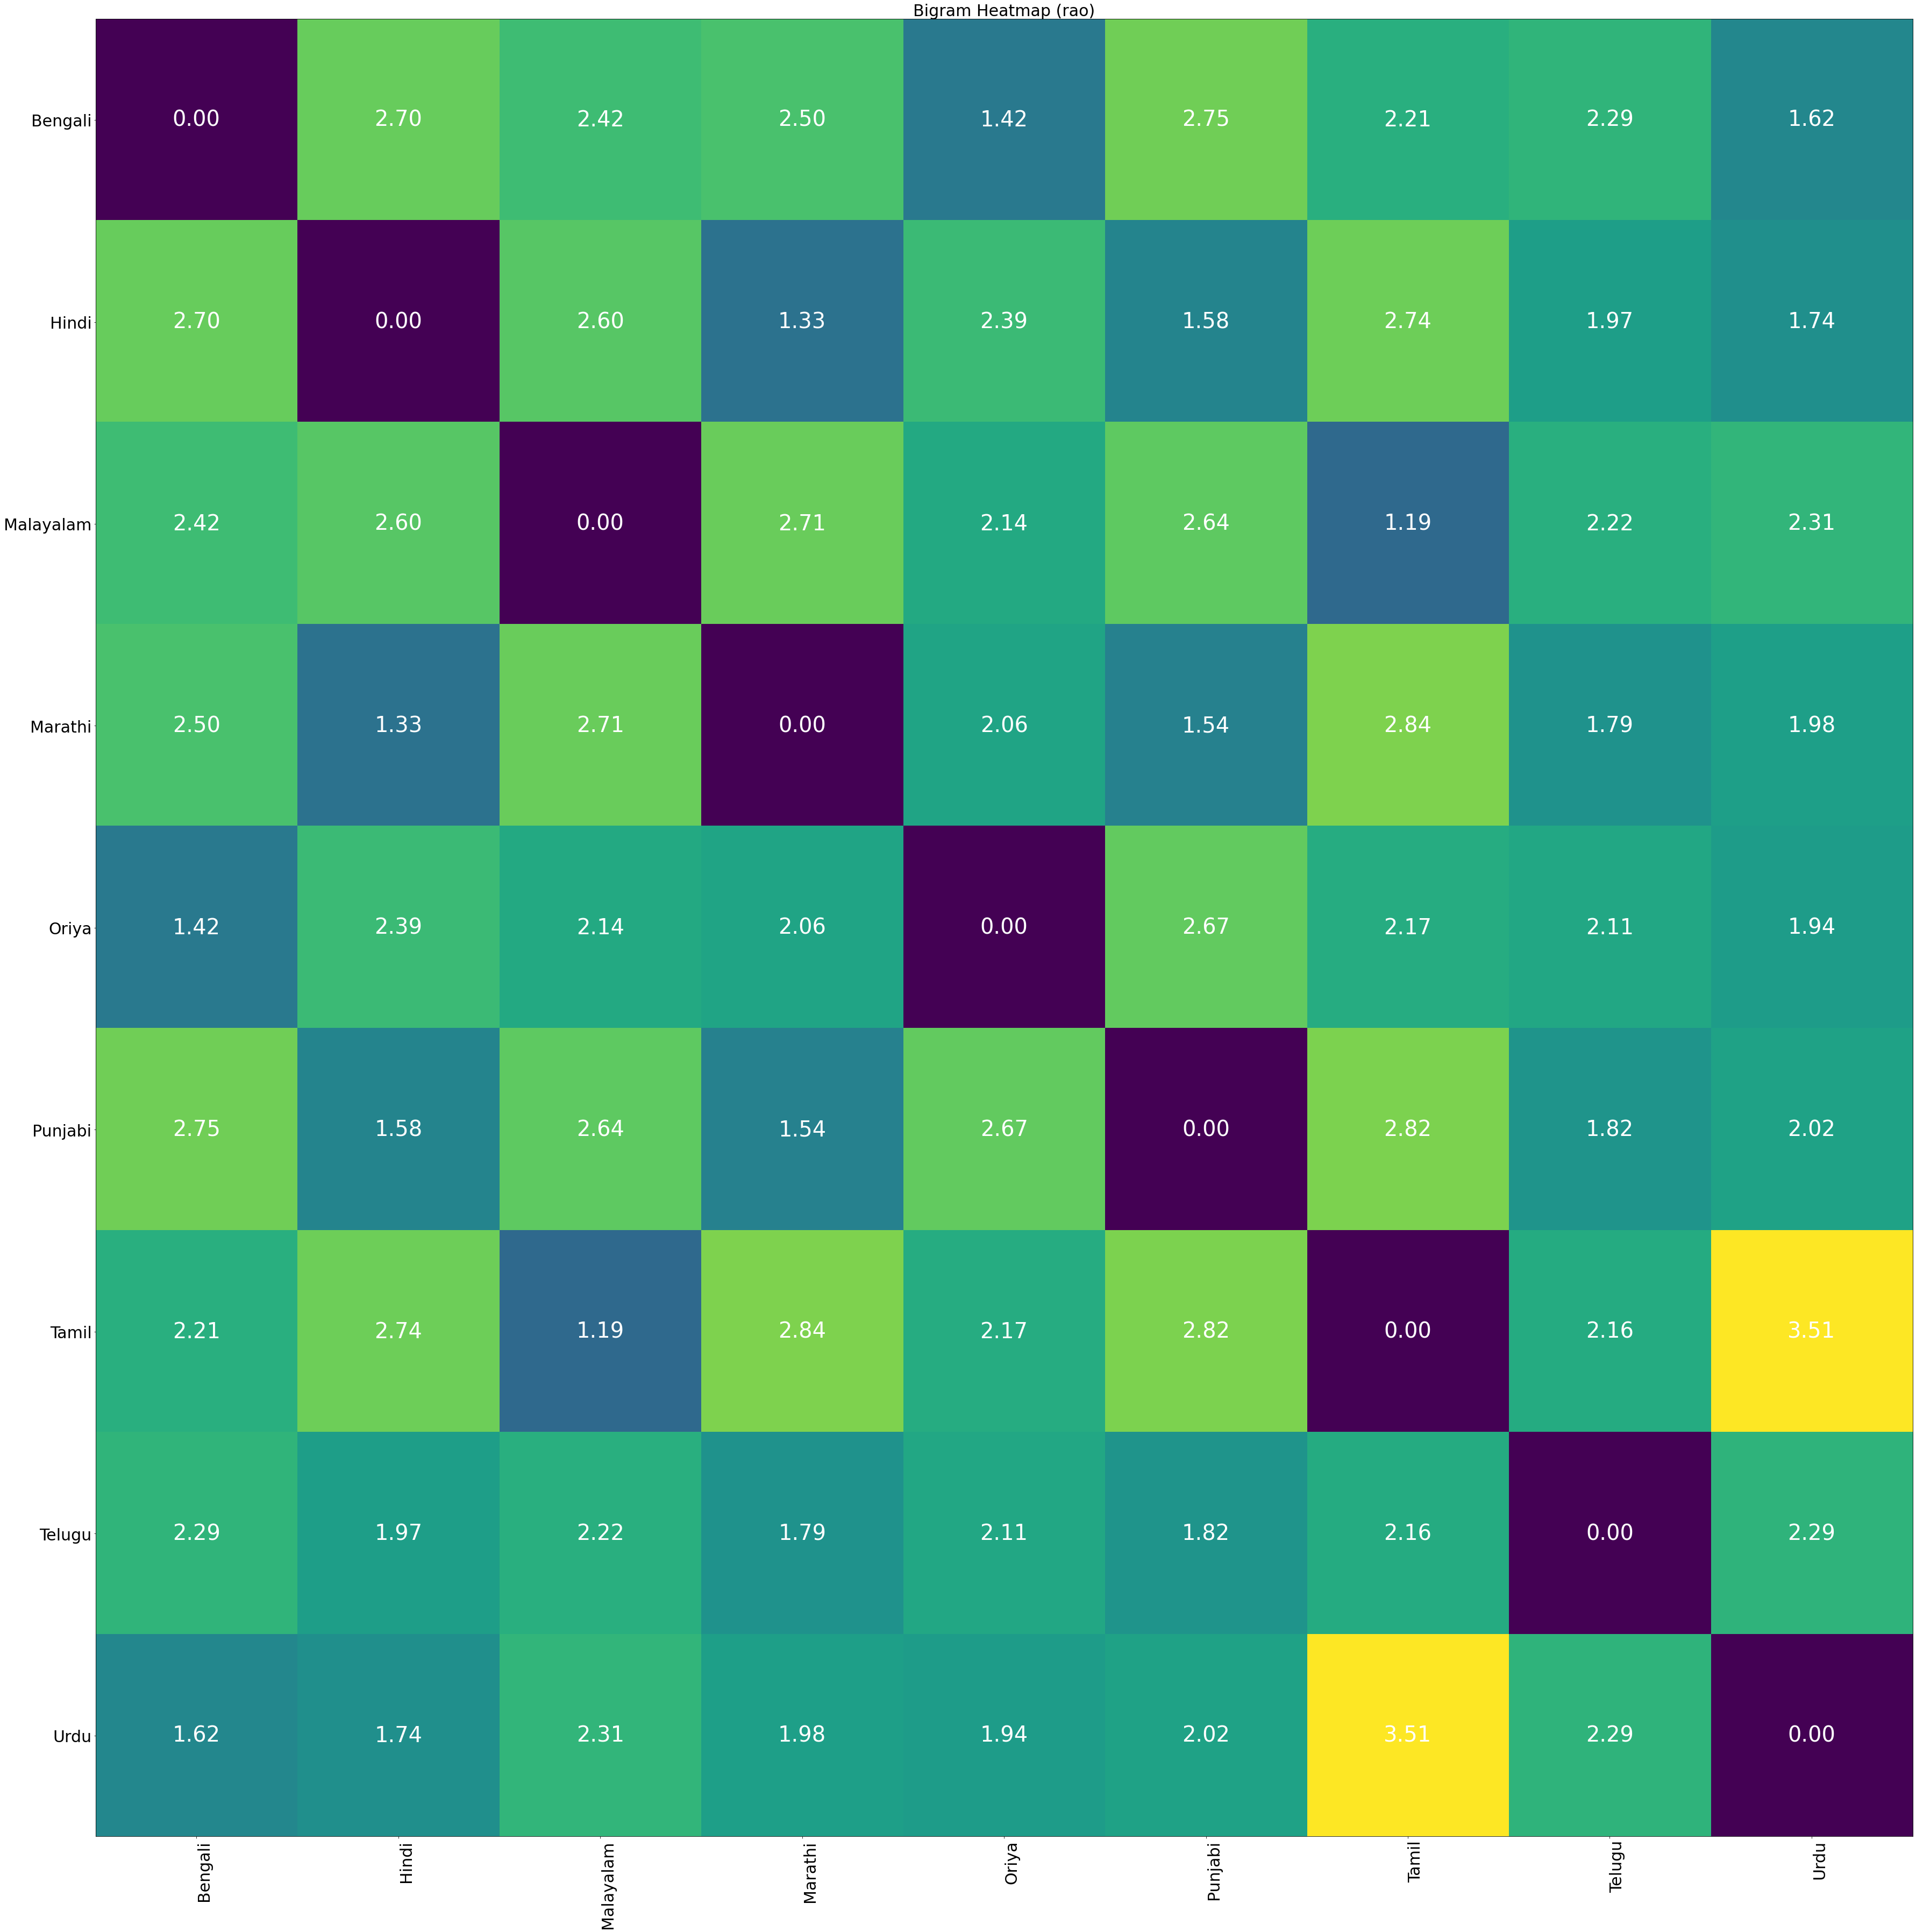

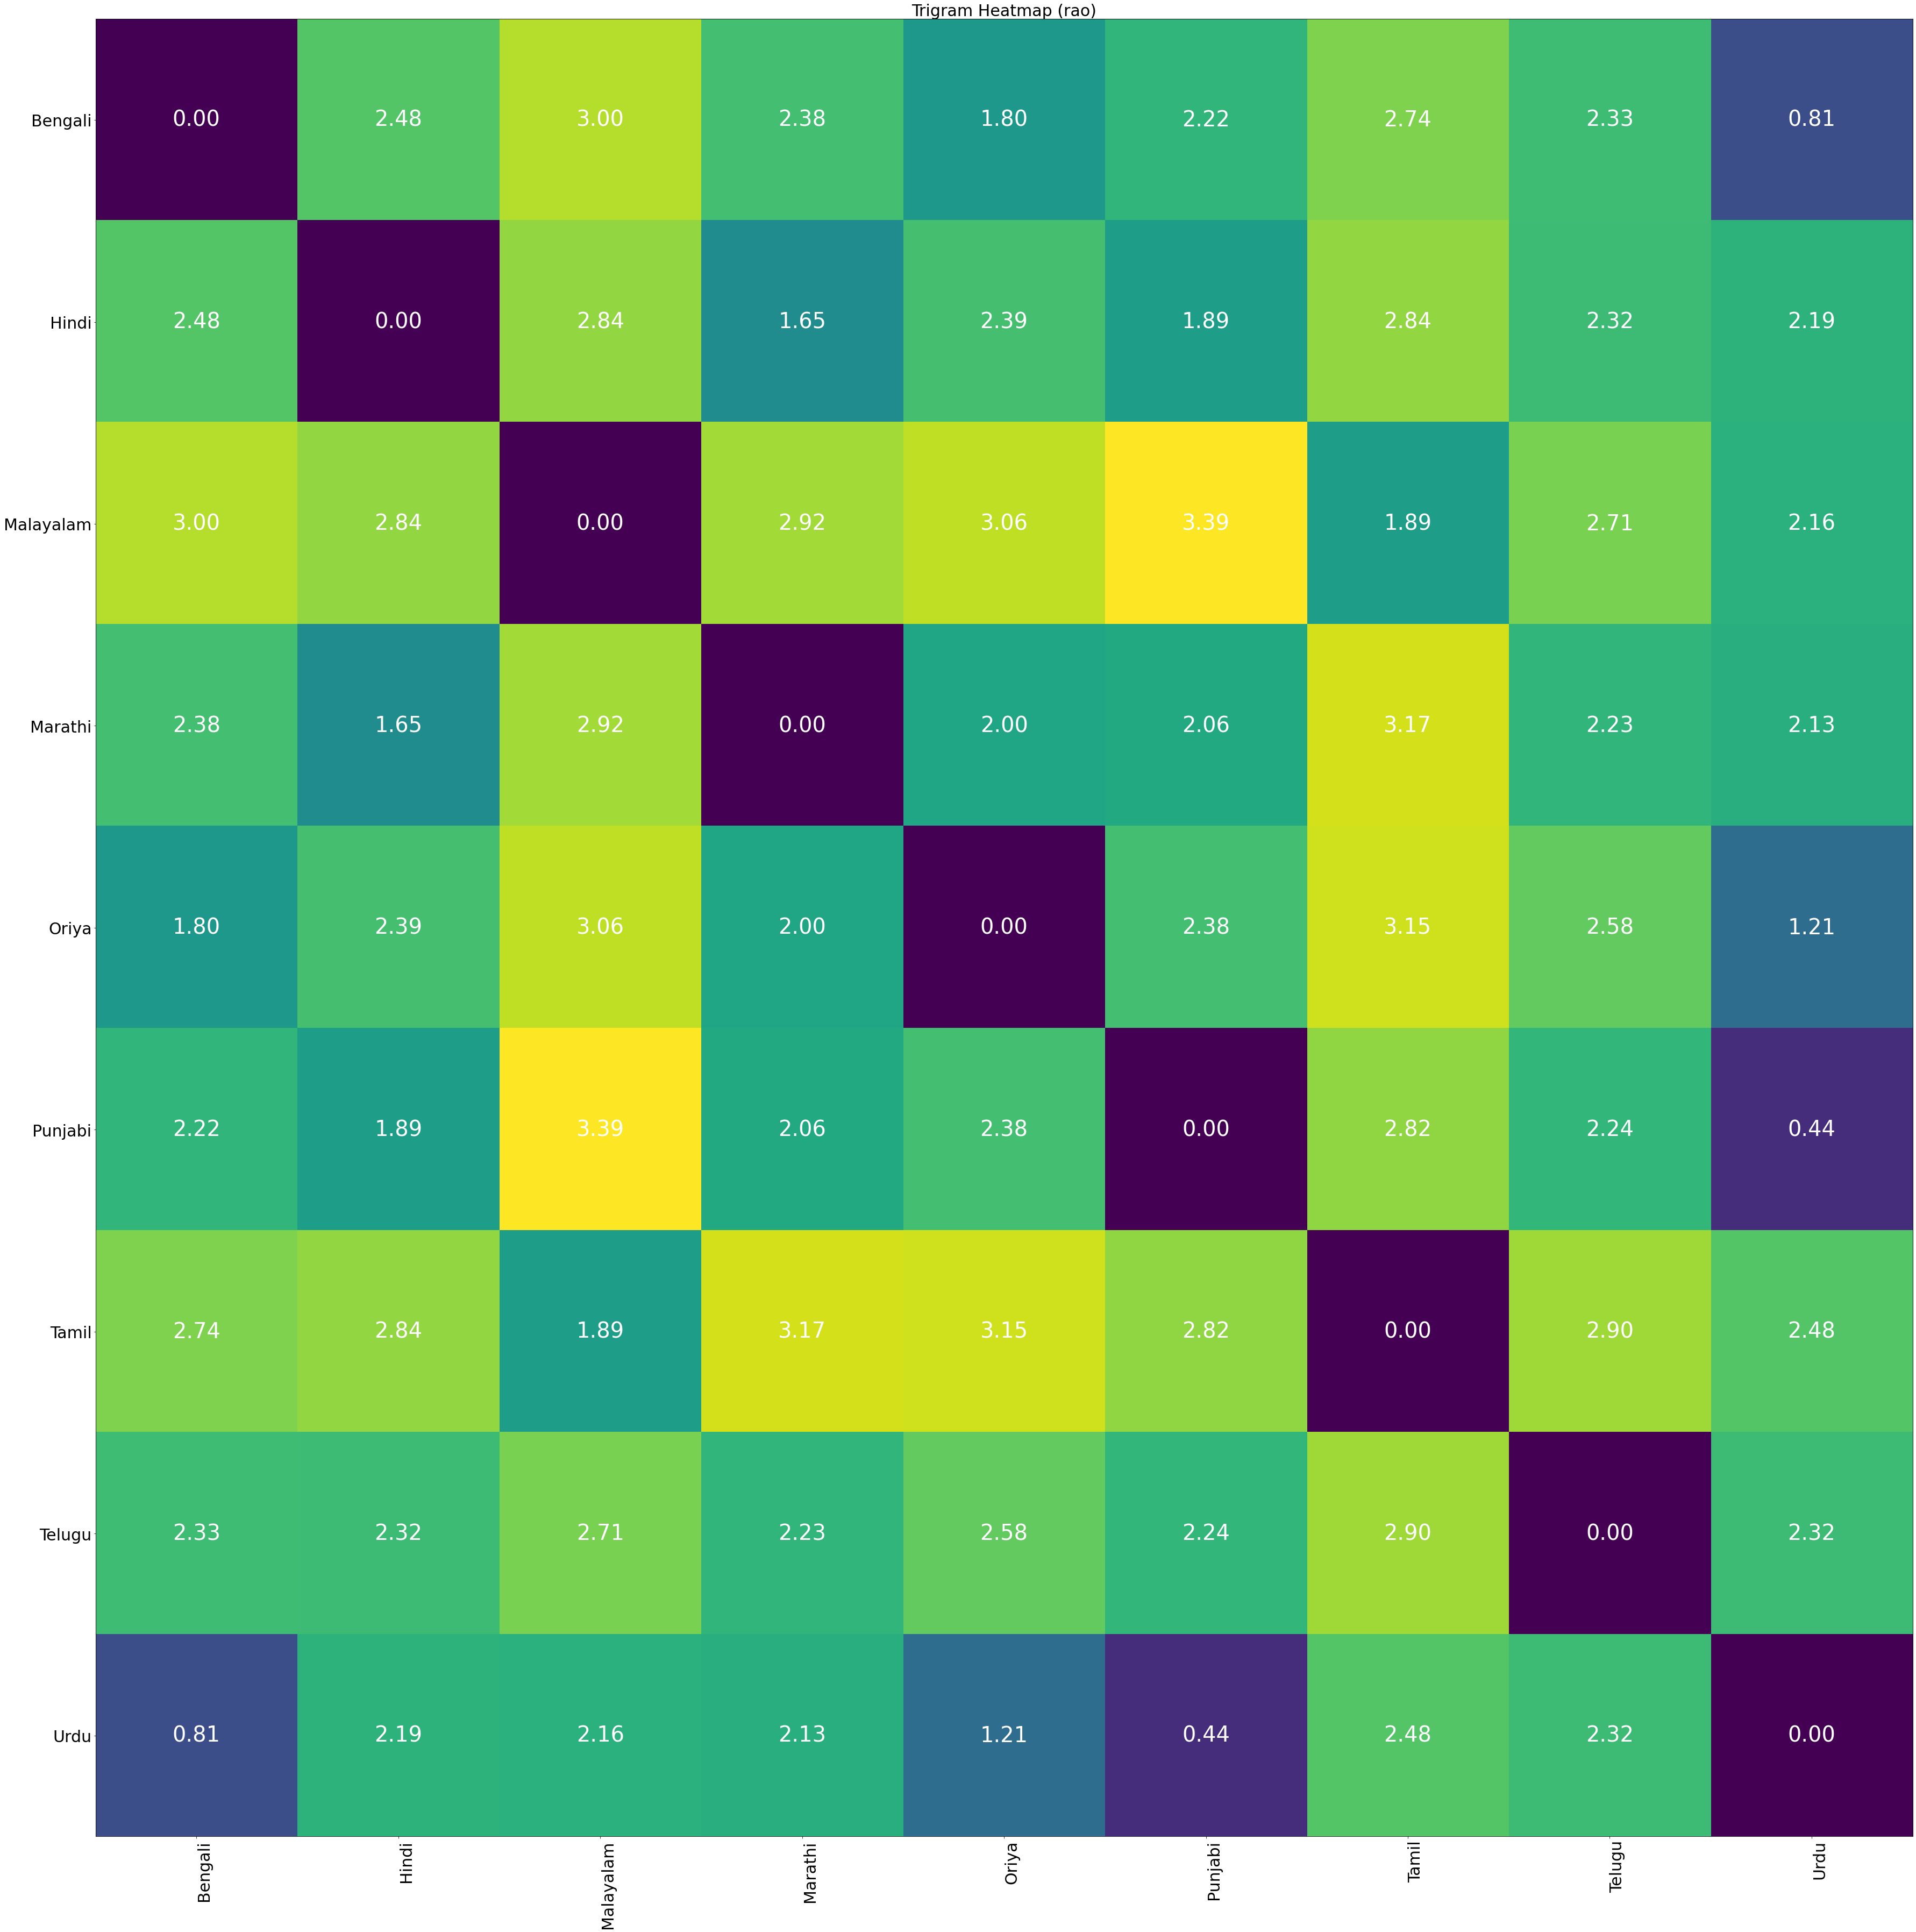

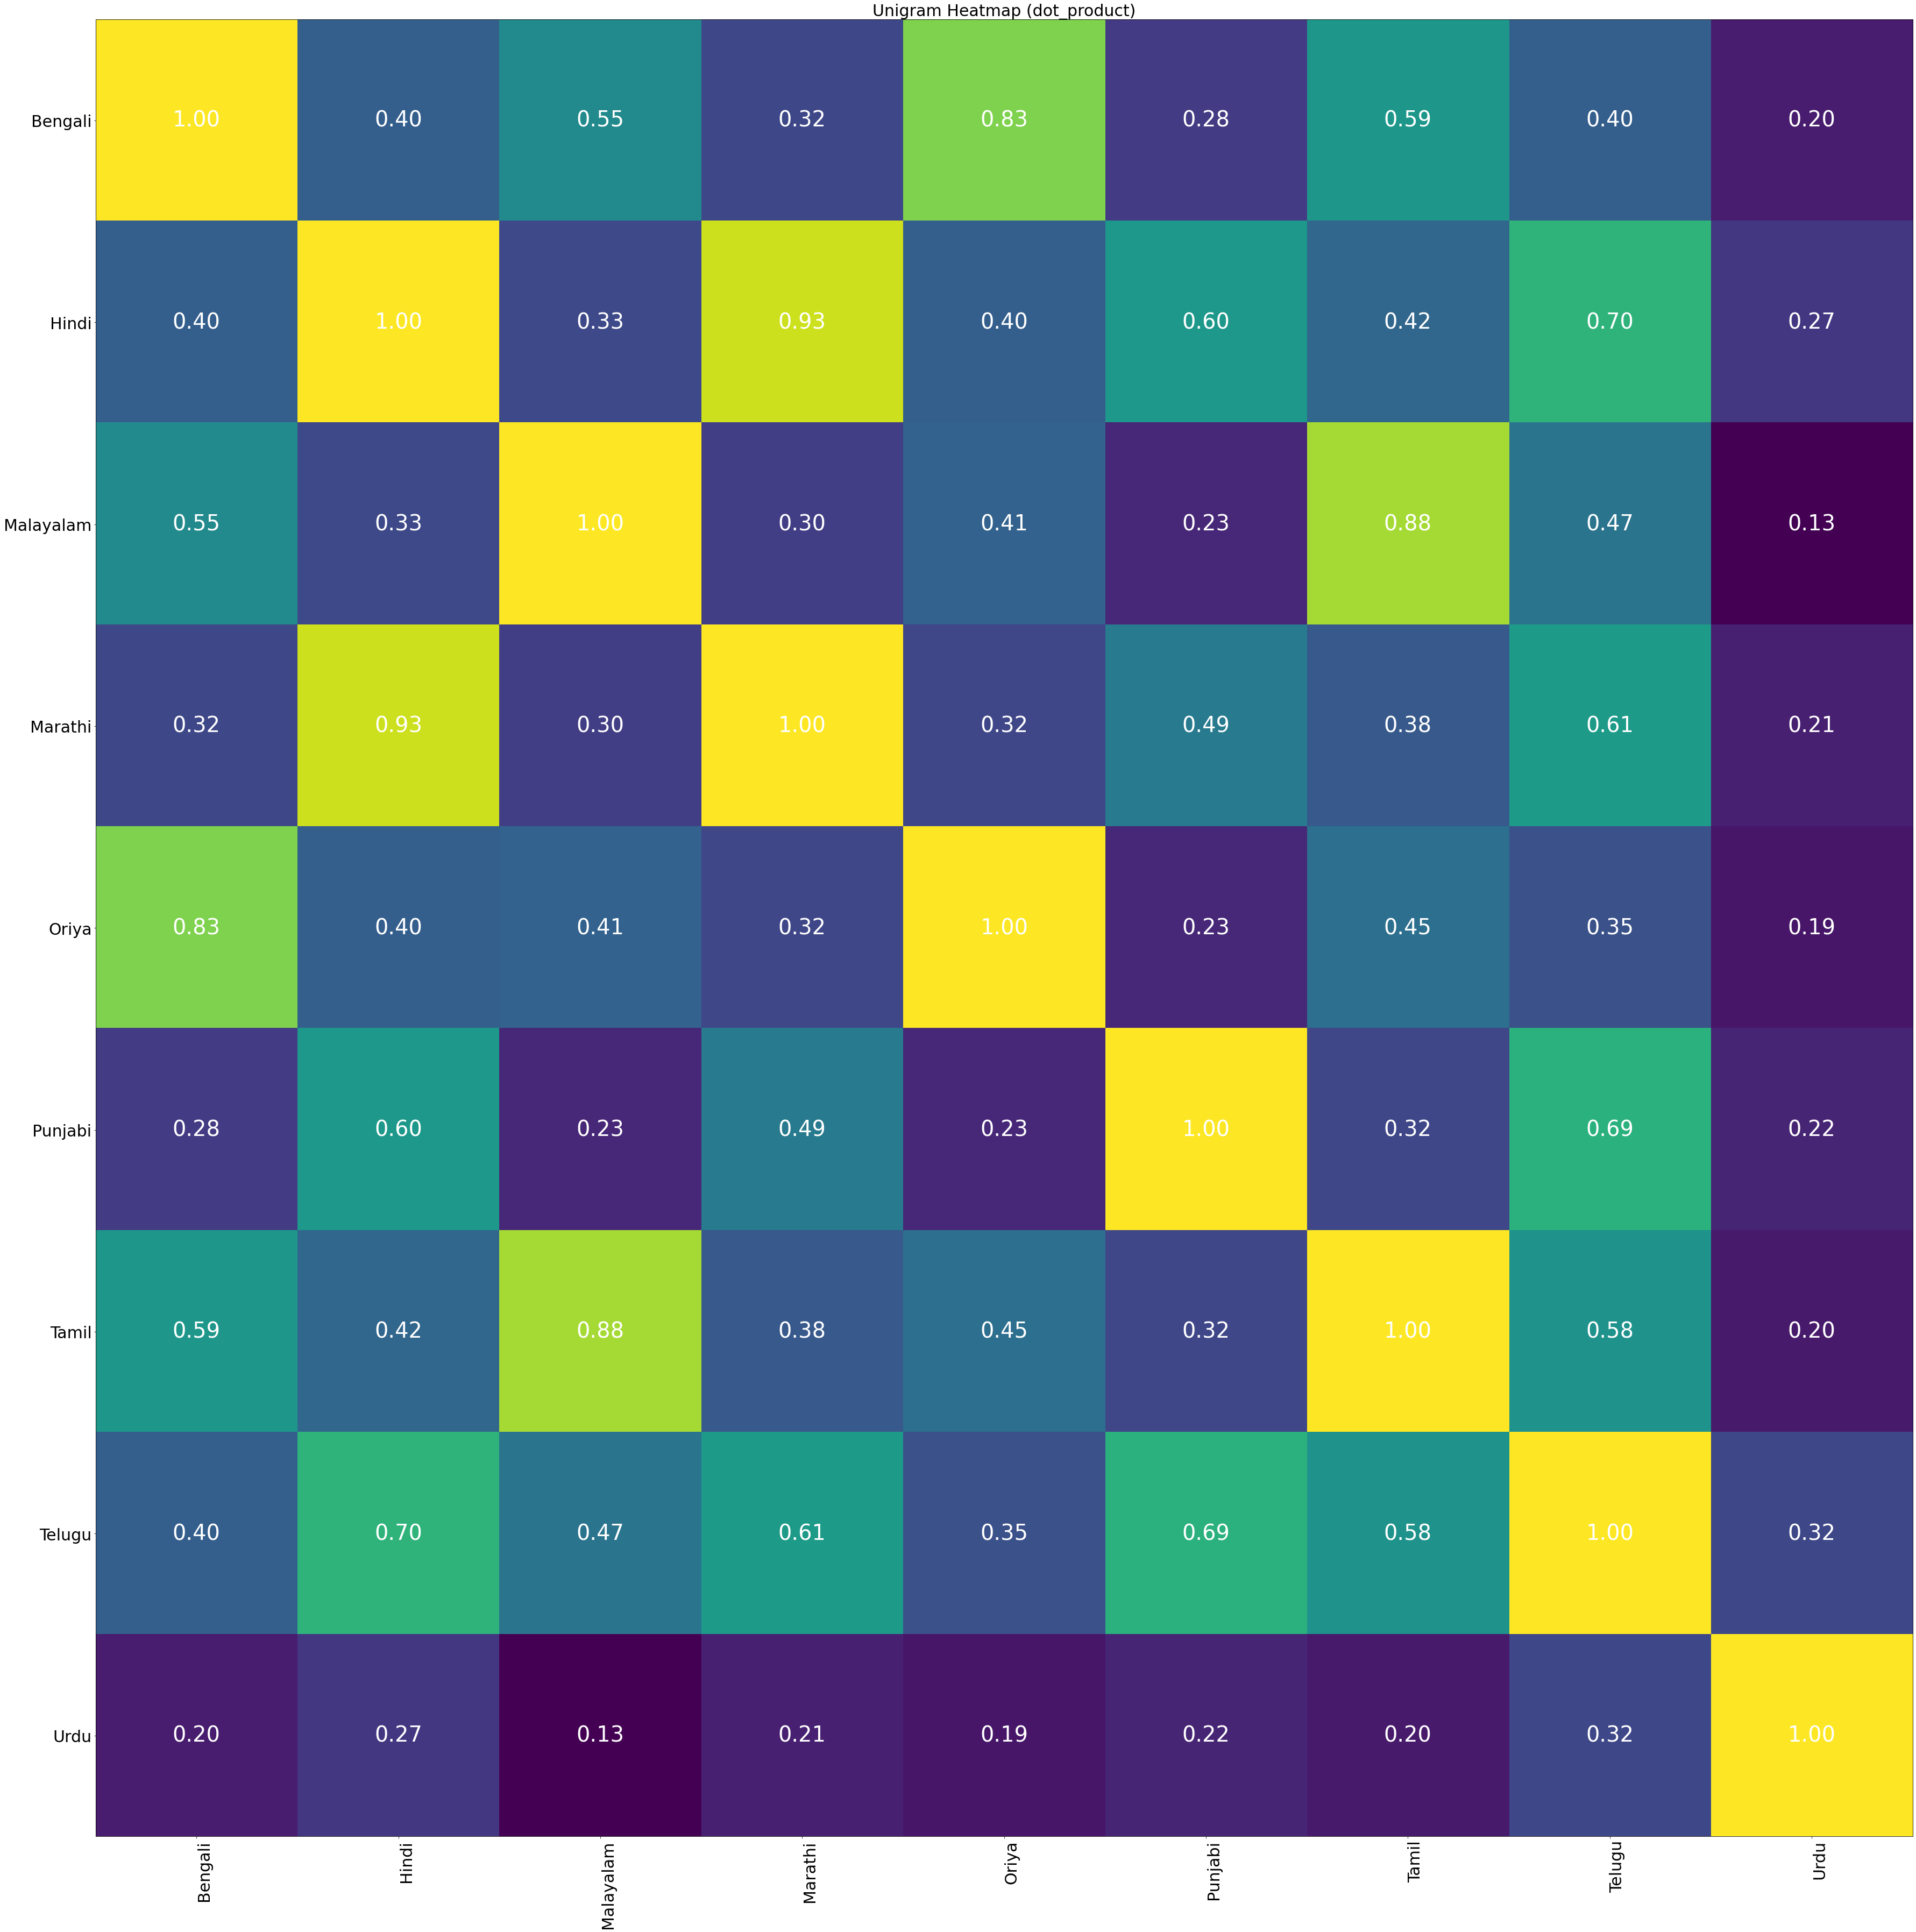

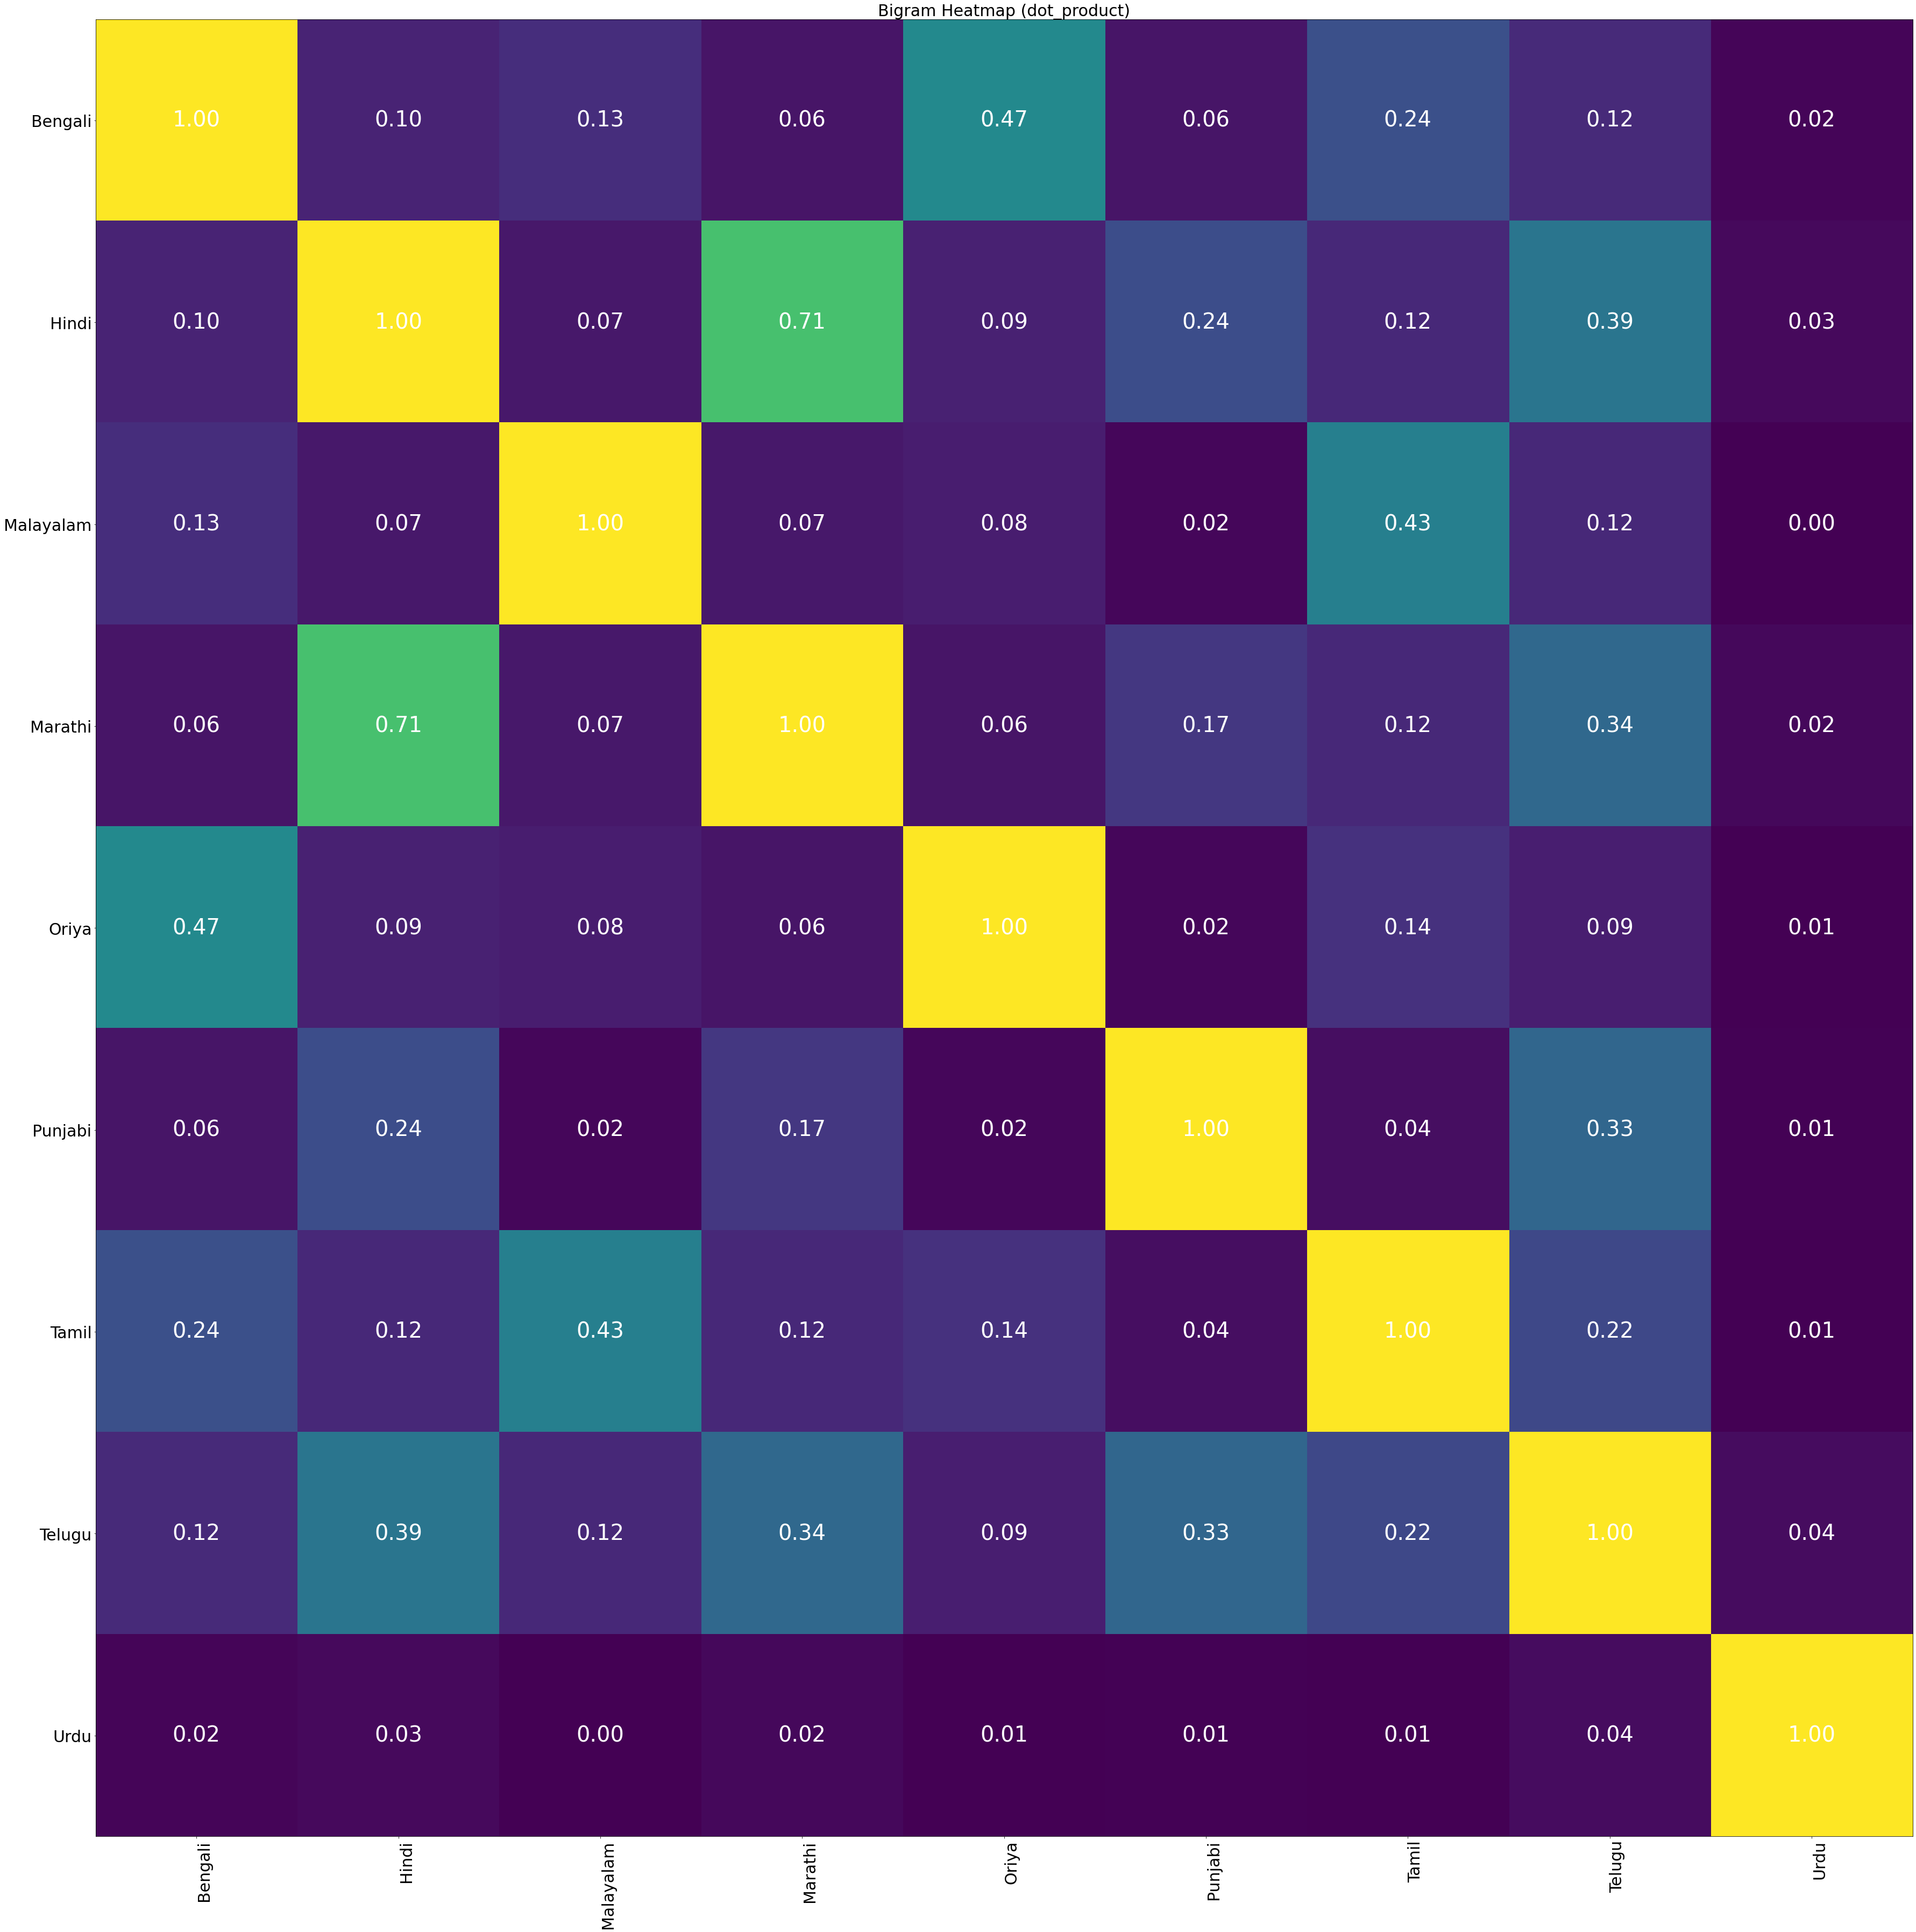

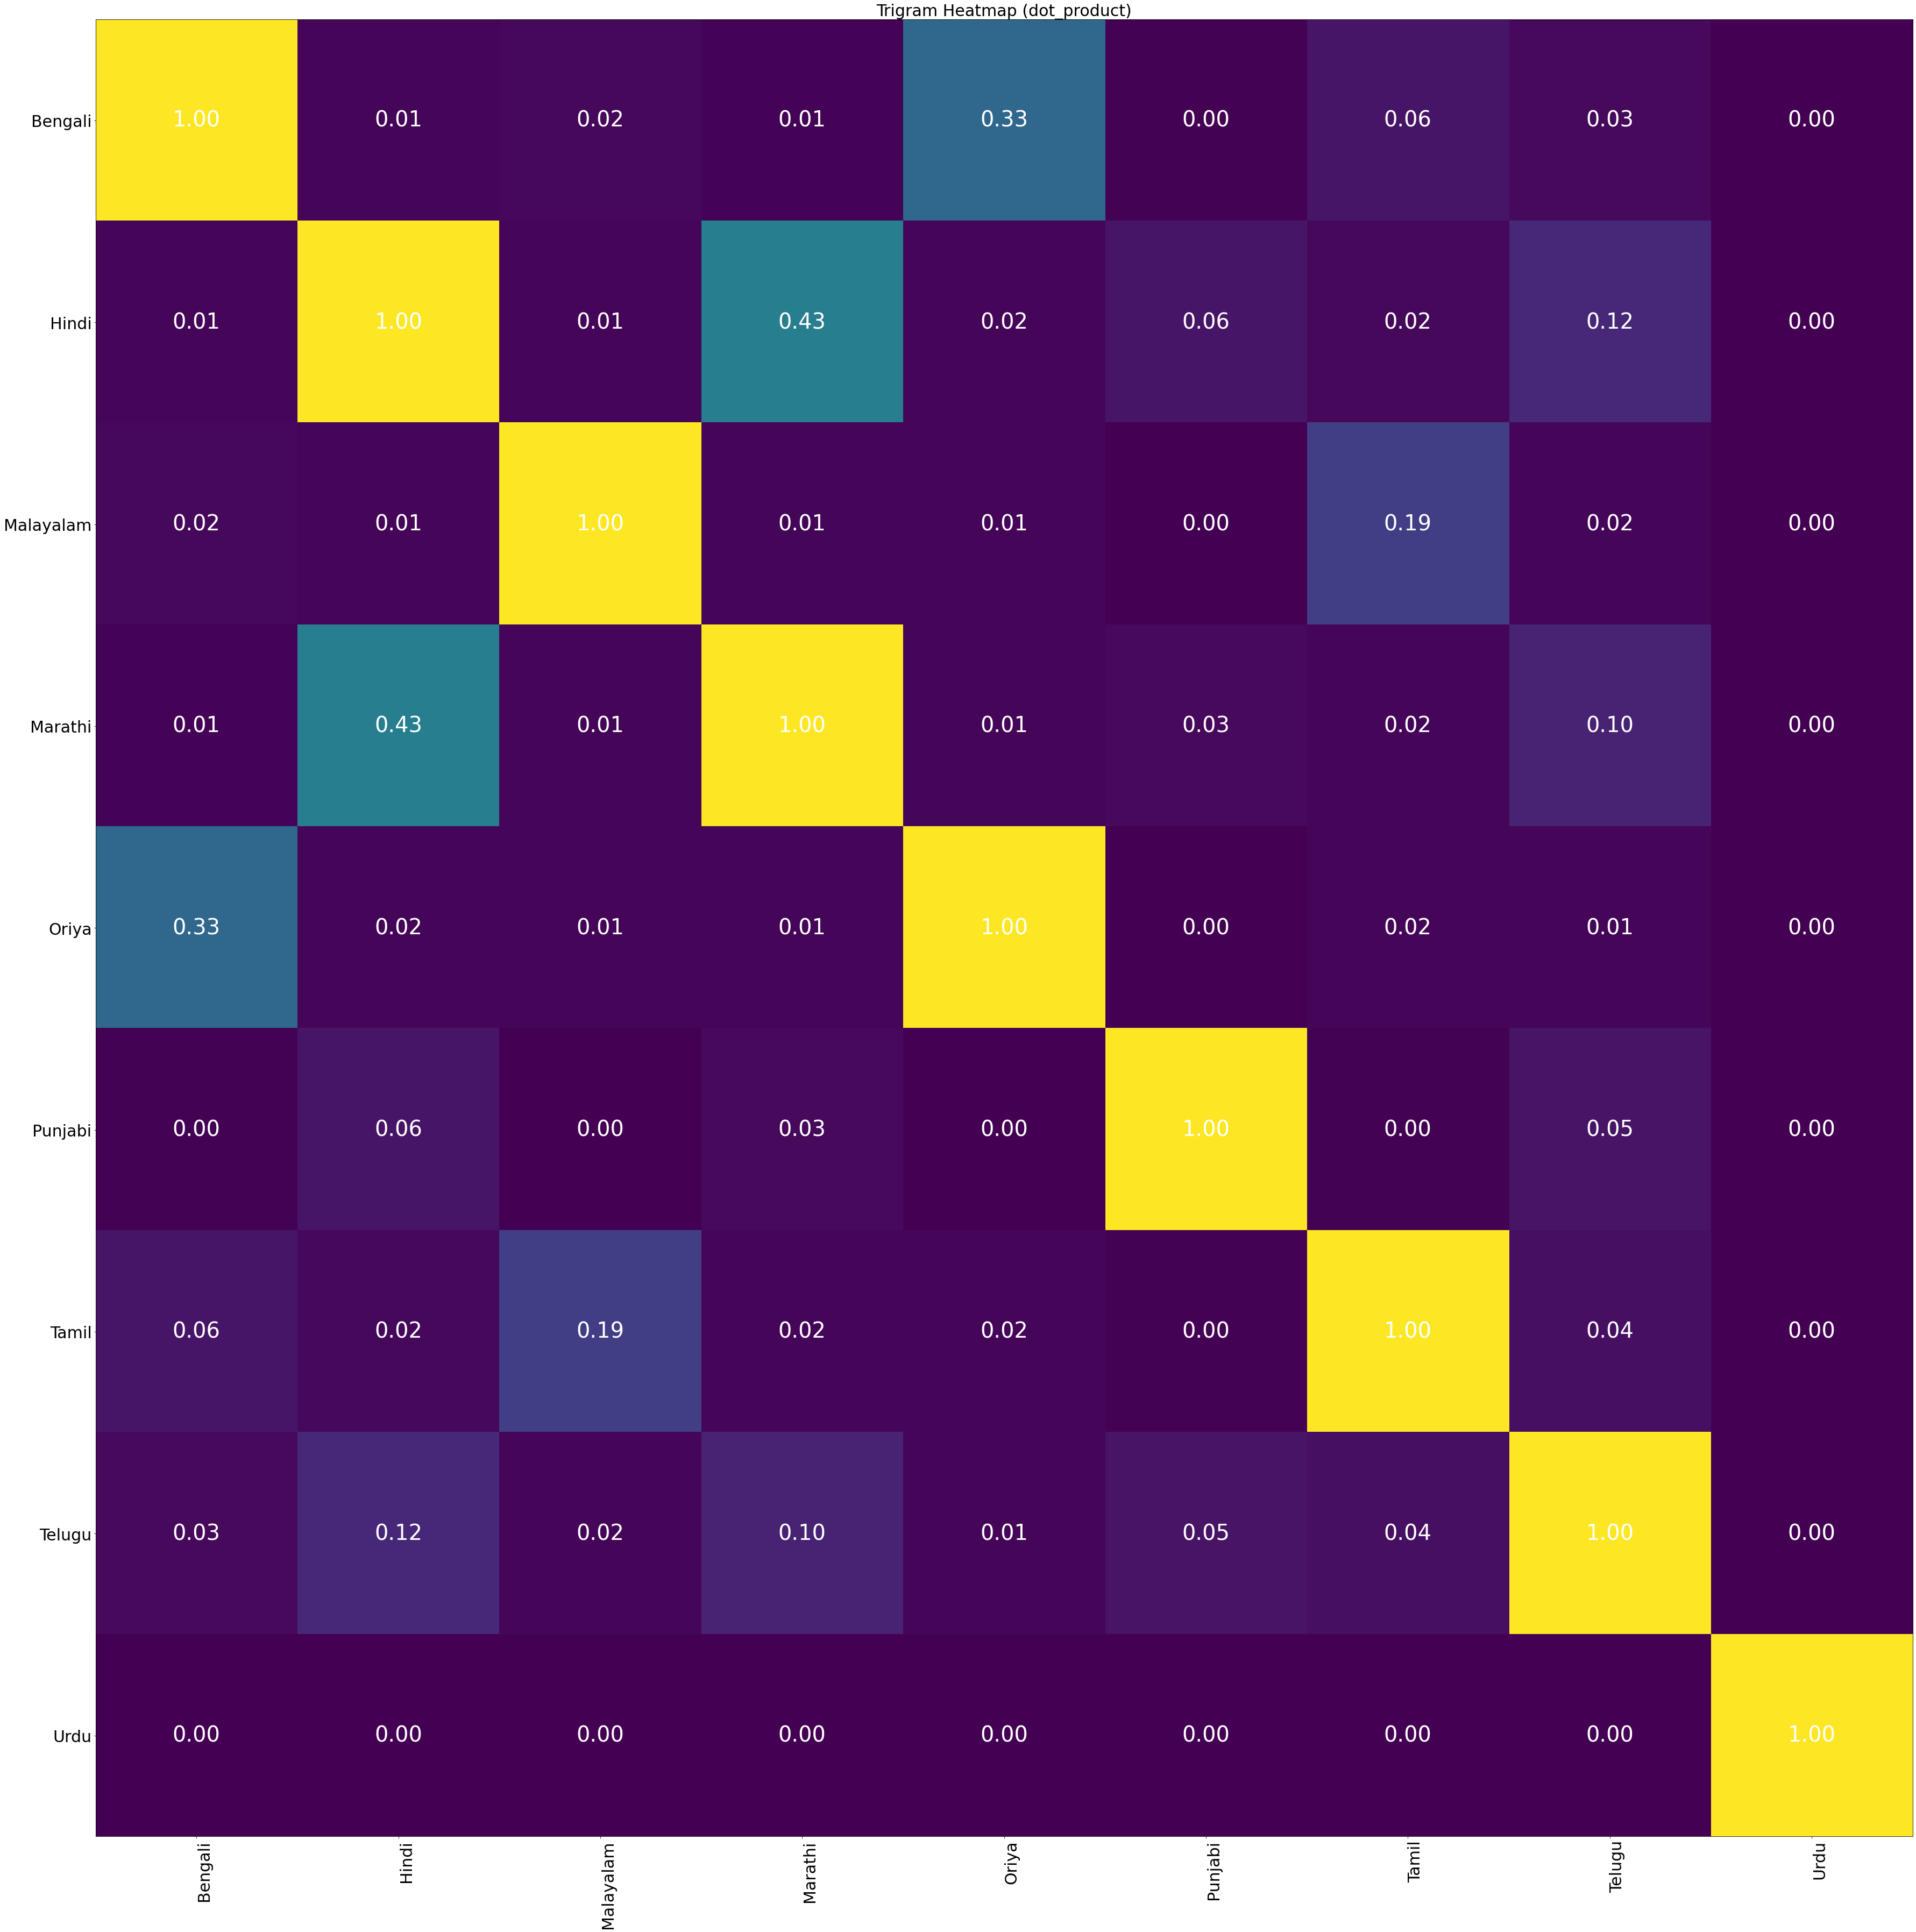

In [37]:
for p,parameter in enumerate(parameters):  
  sub_arrays_list = arrays_list[p]
  for a,arrays in enumerate(sub_arrays_list):  
    fig, ax = plt.subplots()
    im = ax.imshow(arrays)

    ax.set_xticks(np.arange(len(list_of_languages)))
    ax.set_yticks(np.arange(len(list_of_languages)))

    ax.set_xticklabels(list_of_languages,fontsize=30)
    ax.set_yticklabels(list_of_languages,fontsize=30)

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor")
    
    for i in range(len(list_of_languages)):
        for j in range(len(list_of_languages)):
            text = ax.text(j, i, "{:.2f}".format(arrays[i, j]),
                          ha="center", va="center", color="w", size=40, fontdict=None)

    plt.title(f"{name_list[a]} Heatmap ({parameter})",fontsize=30)

    fig.set_figwidth(50)
    fig.set_figheight(50)

    fig.tight_layout()
    plt.show()

In [39]:
vector_unigram = []
vector_bigram = []
vector_trigram = []

In [40]:
with open('/content/IPA02.csv') as f:
  lines = f.read()
IPA_list = lines.replace("'","").replace(" ","").replace("{","").replace("}","").split(",")

In [41]:
IPA_list_bigram = []
for i in IPA_list:
  for j in IPA_list:
    IPA_list_bigram.append(i+j)


# IPA_list_trigram = []
# for i in IPA_list:
#   for j in IPA_list:
#     for k in IPA_list:
#       IPA_list_trigram.append(i+j+k)

In [42]:
len(IPA_list_bigram)

41209

In [43]:
for i in range(len(list_of_languages)):
  vector_unigram.append([0] * len(IPA_list))
  vector_bigram.append([0] * ( len(IPA_list) * len(IPA_list) ))
  # vector_trigram.append([0] * (len(IPA_list) * len(IPA_list) * len(IPA_list)))

In [44]:
len(vector_unigram[0])

203

In [18]:
for i in vector_unigram:
  print(i)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [19]:
# for i,language1 in enumerate(list_of_languages)
d = {}
with open('/content/drive/MyDrive/Languages/Bengali/unigram02.csv') as f:
  for i in f.readlines():
    if i == "":
      continue
    i = i.replace("\n","").split(",")
    # print(i)
    try:
      d[i[0]] = i[1]
    except:
      pass
# print(d)

for IPA in d:
  try:
    vector_unigram[list_of_languages.index("Bengali")][IPA_list.index(IPA)] = d[IPA]
  except:
    try:
      print(list_of_languages.index("Bengali"),IPA_list.index(IPA))
    except:
      print(IPA)


b
e
n̪
a
m
i
d̪
r
b̤
ɔ
ɡ
t̪
p
k
l̪
u
t
d͡z
ে
া
o
d͡ʑ
e̯
kʰ
t͡ɕ
ŋ
s̪
t̪ʰ
h
d̪̤
ʂ
।
ɕ
d
#
*
t͡ɕʰ
n
ɽ
tʰ
্
̤
ɡ̤
ɔ̃
ɸ
j
ৗ
ɦ
d͡ʑ̤
২
ã
ə
l
‍
ঃ
ɽ̤
d̤
ĩ
d͡ʒ
ũ
‘
r̤
t͡ʃʰ
​
a̤
i̤
ẽ
t͡ʃ
̃
ɔ̤
ŋ̤
৷
e̤
o̤
১
৪
w
৮
&
/
@
$


In [45]:
for i,language1 in enumerate(list_of_languages):
  d = {}
  with open(f'/content/drive/MyDrive/Languages/{language1}/unigram02.csv', 'r' , encoding = "utf-8") as f:
    for i in f.readlines():
      if i == "":
        continue
      i = i.replace("\n","").split(",")
      try:
        d[i[0]] = i[1]
      except:
        pass
  for IPA in d:
    try:
      vector_unigram[list_of_languages.index(language1)][IPA_list.index(IPA)] = d[IPA]
    except:
      try:
        print(list_of_languages.index(language1),IPA_list.index(IPA))
      except:
        print(IPA)
  d = {}
  with open(f'/content/drive/MyDrive/Languages/{language1}/bigram02.csv', 'r' , encoding = "utf-8") as f:
    for i in f.readlines():
      if i == "":
        continue
      i = i.replace("\n","").split(",")
      try:
        d[i[0]] = i[1]
      except:
        pass
  for IPA in d:
    try:
      vector_bigram[list_of_languages.index(language1)][IPA_list_bigram.index(IPA)] = d[IPA]
    except:
      try:
        print(list_of_languages.index(language1),IPA_list_bigram.index(IPA))
      except:
        print(IPA)
  # d = {}
  # with open(f'/content/drive/MyDrive/Languages/{language1}/trigram02.csv', 'r' , encoding = "ISO-8859-1") as f:
  #   for i in f.readlines():
  #     if i == "":
  #       continue
  #     i = i.replace("\n","").split(",")
  #     try:
  #       d[i[0]] = i[1]
  #     except:
  #       pass
  # for IPA in d:
  #   try:
  #     vector_trigram[list_of_languages.index(language1)][IPA_list_trigram.index(IPA)] = d[IPA]
  #   except:
  #     pass
  #     # try:
  #     #   print(list_of_languages.index(language1),IPA_list_trigram.index(IPA))
  #     # except:
  #     #   print(IPA)



‍
​
b

e
p
ɕ
o
ɡ
m
k
t
u
i
২
a
d͡z
r
ɔ‍
‍্
t͡ɕ
h
d
​​
​d̪
d͡ʑ
​m
ʂ
ɸ
​k
ɽ
̤
​e
​n̪
#
*
/
।
$

​
b

j
l
p
i
ʃ
a
r
ŋ
k
d͡ʒ
ɡ
m
s
d
e
n
ʈ
t
​​
​ɦ
t͡ʃ
v
aː
।
ɔː
ɦ
u
ɖ
æː
iː
​k
uː
r̩
ãː
o
​d͡ʒ
#
*
/
$

‌
​
a

iː
m
p
ɾ
ʋ
r
aː
b
ɟ
്‌
‌s
‌n̪
ɡ
i
k
s
e
ʈ
‌ʈ
‌m
u
ɖ
j
ɲ
oː
t͡ʃ
o
ʃ
ɦ
l
eː
‌k
ʂ
‌ʋ
‌l
uː
‌d̪
‌ɳ
​​
‌t̪
#
*
/
‌ɖ
‌n
‌t
f
$

‍
​
p

ɦ
d͡ʑ
s
j
ɕ
l
a
i
v
d
ɡ
k
m
n
ʈ
१
t
e
r‍
‍j
b
aː
r
u
ɖ
t͡ɕ
d̤‍
o
uː
r̩
tʰ‍
æː
​​
​aː
​ɦ
#
*
/
k‍
‍ʈ
ɳ‍
iː
​n
$

​

ɔ
d
i
e
a
l
p
d͡ʒ
g
k
m
s
n
ʈ
t
​​
​r
b
।
r
u
h
ɖ
​
​s
t͡ʃ
​e
​u
​g
​k
​t͡ʃ
​d
​m
​p
​t
|
​b
​ɔ
​d͡ʒ
​n
଼
o
​|
ɳ
w
/

​
ə

ɪ
l
s
p
ɾ
ɡ
d͡ʒ
m
k
n
ʈ
ɛ
b
t
d
j
ʃ
ʋ
​​
​s
t͡ʃ
ʊ
ɦ
ɖ
ɑ
z
​ə
ɣ
ɔ
​t̪
i
​ɦ
​ʋ
u
​ɡ
o
e
#
*
/
$

​
a

i
k
aː
m
ʋ
e
d͡ʒ
p
t͡ʃ
ʈ
u
ɾ
j
o
​​
​e
​a
oː
h
l
eː
ɲ
​oː
iː
​k
​p
​u
s
​n̪
​ʋ
​i
uː
#
*
/
$

‌
​
n‌
‌b

iː
p
s‌
‌t̪
k‌
‌l
ʃ
r
ʌ
ʋ
m
‌k
ʈ‌
‌n
d͡ʒ
l
k
s
n
ŋ
i
e
ɖ‌
‌ɡ
t͡ʃ‌
‌m
r‌
j
d͡ʒ‌
b
ɡ
a
o
h
ɖ
t͡ʃ
​​
​ʌ
oː
ʂ
m‌
u
eː
ɪ
ʈ
‌ʋ
‌p
ɡ‌
l‌
​d͡ʒ
ə‌
‌pʰ
p‌
t̪‌
‌ʈ
‌h
#
*
/
pʰ‌
b‌
‌s
$

​

p
ɑː
n
m
r
ک
ɡ
ی
b
ہ
s
t͡ʃ
d͡ʒ
uː
x
ʃ
z
ɖ
l
f

In [46]:
def getTSNE(array,title):
  X = np.array(array)
  X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
  df = pd.DataFrame()
  df["y"] = pd.array(list_of_languages)
  df["comp-1"] = X_embedded[:,0]
  df["comp-2"] = X_embedded[:,1]
  sns.relplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                  palette=sns.color_palette("hls", len(list_of_languages)),
                  data=df).set(title=f"{title} T-SNE projection") 
  return X_embedded
  

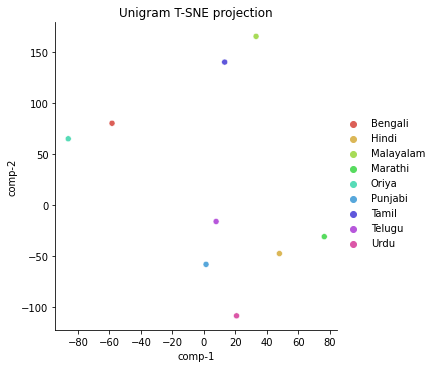

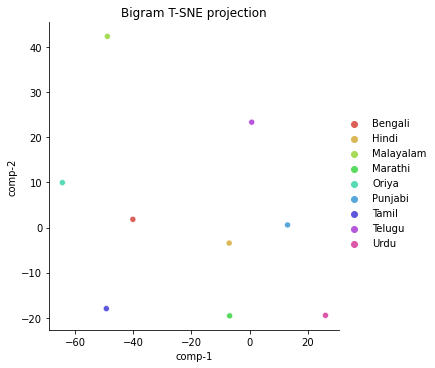

In [47]:
unigram_TSNE = getTSNE(vector_unigram,"Unigram")
bigram_TSNE = getTSNE(vector_bigram,"Bigram")
# getTSNE(vector_trigram,"Trigram")

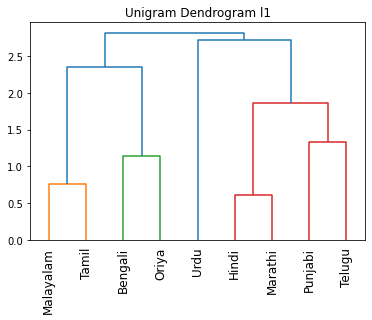

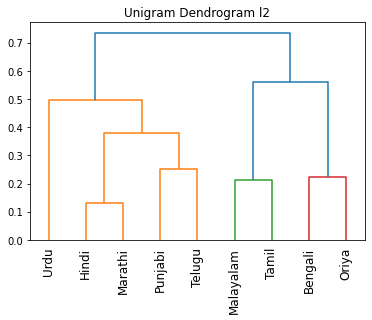

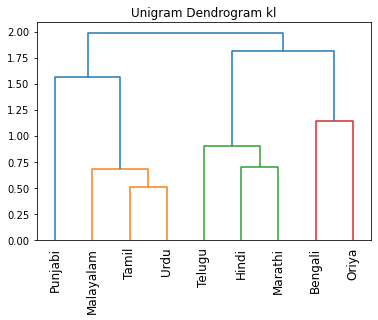

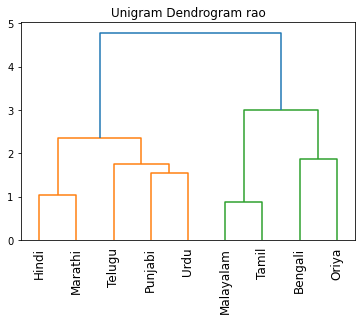

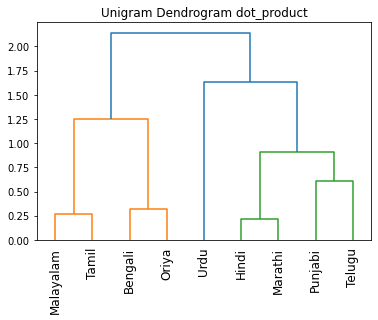

In [48]:
for parameter in parameters:  
  Unigram_Dendrogram = sch.dendrogram(sch.linkage(matrix_unigram[parameters.index(parameter)], method = 'ward'),
                                      labels = list_of_languages,
                                      leaf_rotation = 90)
  plt.title("Unigram Dendrogram " + parameter)
  plt.show()


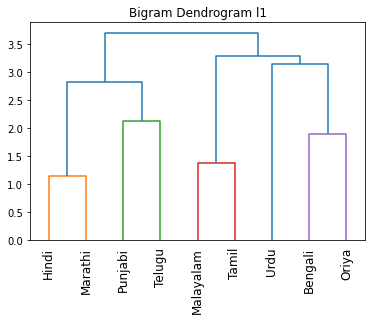

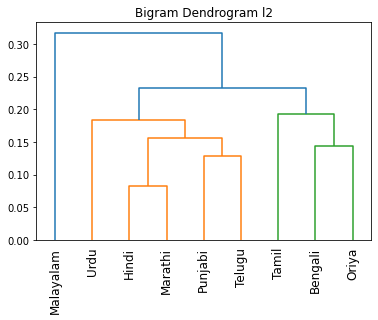

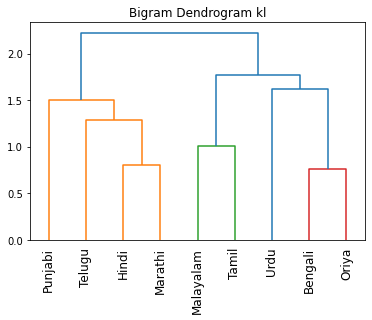

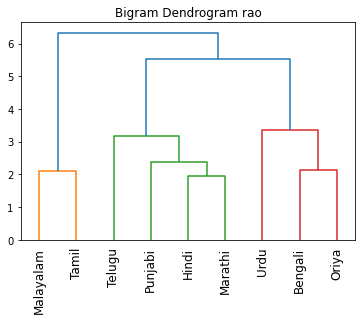

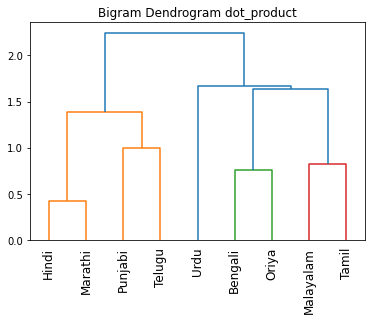

In [49]:
for parameter in parameters:  
  Bigram_Dendrogram = sch.dendrogram(sch.linkage(matrix_bigram[parameters.index(parameter)], method = 'ward'),
                                      labels = list_of_languages,
                                      leaf_rotation = 90)
  plt.title("Bigram Dendrogram " + parameter)
  plt.show()

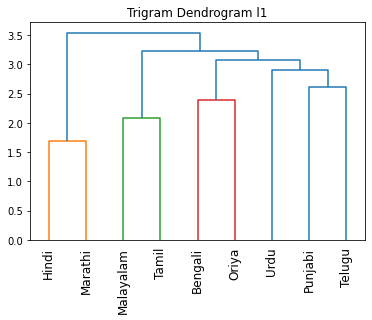

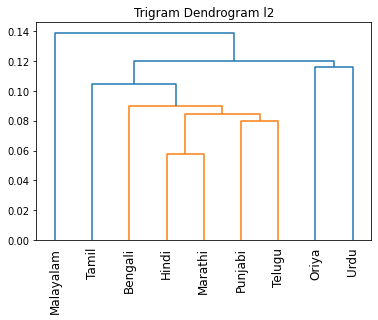

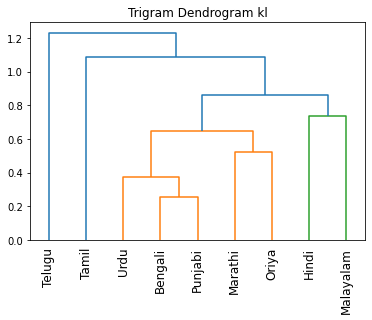

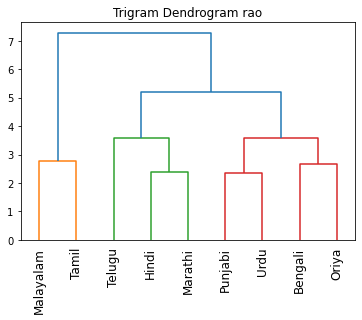

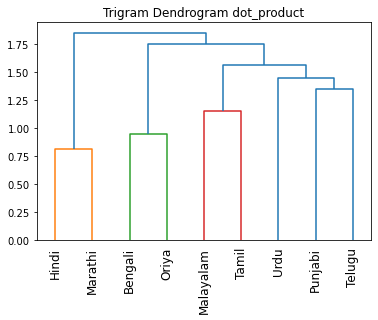

In [50]:
for parameter in parameters:  
  Trigram_Dendrogram = sch.dendrogram(sch.linkage(matrix_trigram[parameters.index(parameter)], method = 'ward'),
                                      labels = list_of_languages,
                                      leaf_rotation = 90)
  plt.title("Trigram Dendrogram " + parameter)
  plt.show()

In [51]:
hc = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(matrix_bigram[0])

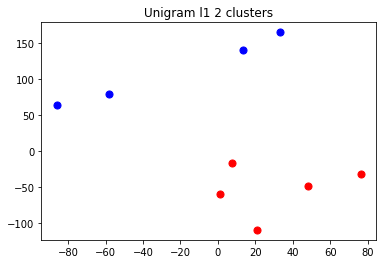

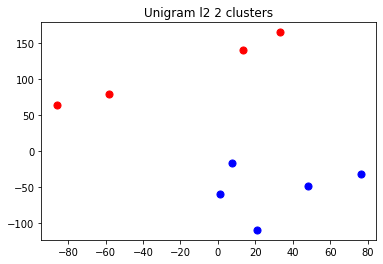

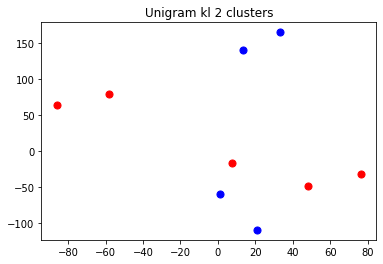

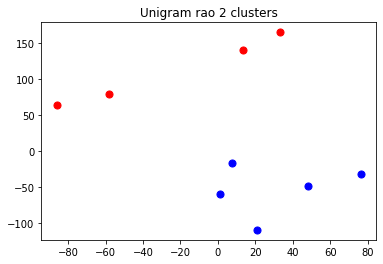

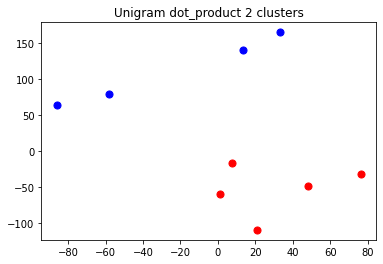

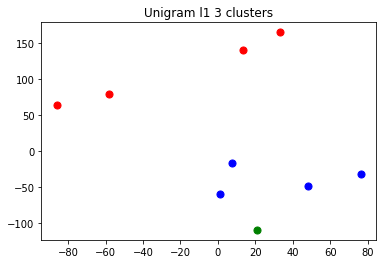

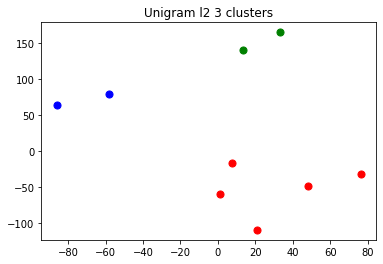

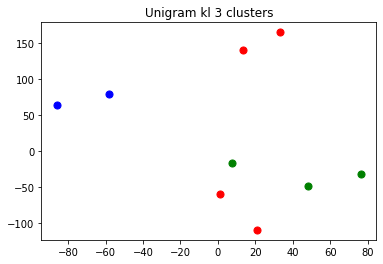

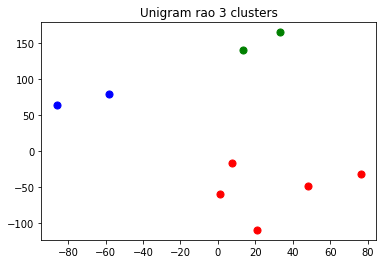

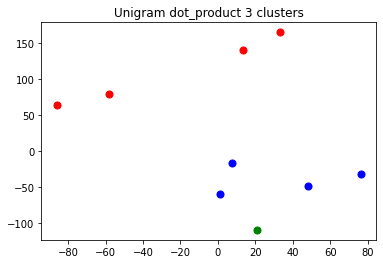

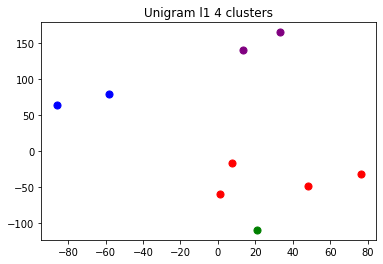

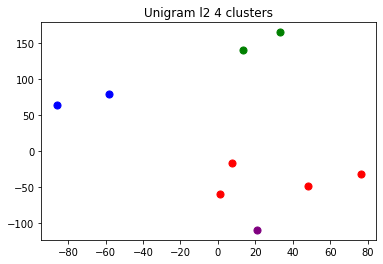

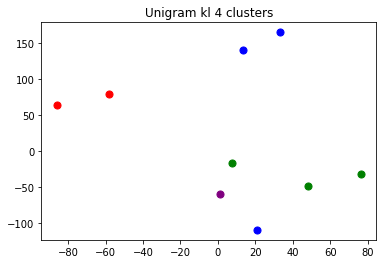

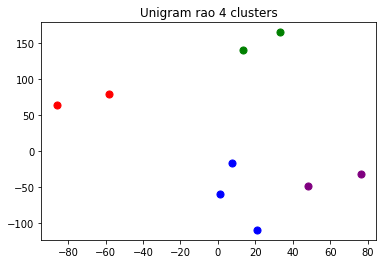

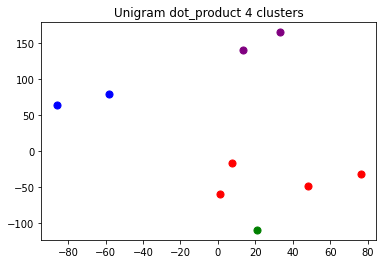

In [53]:
for n in range(2,5):
  for parameter in parameters:
    hc = AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')
    y_hc = hc.fit_predict(matrix_unigram[parameters.index(parameter)])
    plt.scatter(unigram_TSNE[y_hc==0, 0], unigram_TSNE[y_hc==0, 1], s=50, marker='o', color='red')
    plt.scatter(unigram_TSNE[y_hc==1, 0], unigram_TSNE[y_hc==1, 1], s=50, marker='o', color='blue')
    plt.scatter(unigram_TSNE[y_hc==2, 0], unigram_TSNE[y_hc==2, 1], s=50, marker='o', color='green')
    plt.scatter(unigram_TSNE[y_hc==3, 0], unigram_TSNE[y_hc==3, 1], s=50, marker='o', color='purple')
    plt.scatter(unigram_TSNE[y_hc==4, 0], unigram_TSNE[y_hc==4, 1], s=50, marker='o', color='orange')
    plt.scatter(unigram_TSNE[y_hc==5, 0], unigram_TSNE[y_hc==5, 1], s=50, marker='o', color='magenta')
    plt.scatter(unigram_TSNE[y_hc==6, 0], unigram_TSNE[y_hc==6, 1], s=50, marker='o', color='cyan')
    plt.title("Unigram "+ str(parameter) + " " + str(n) + " clusters")
    plt.show()

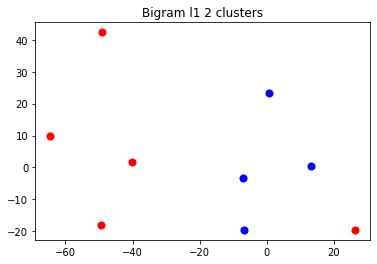

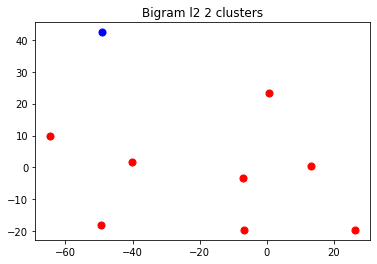

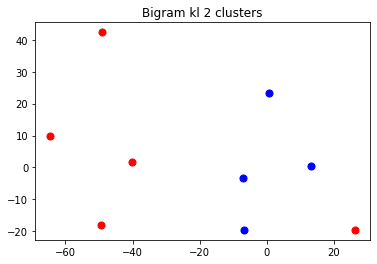

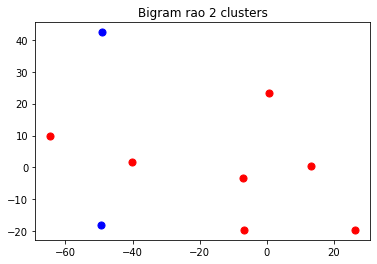

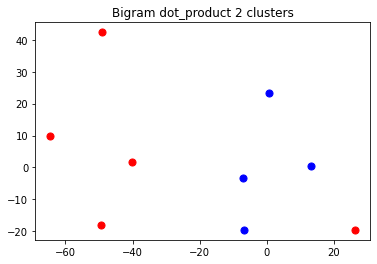

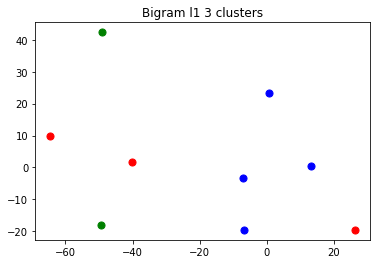

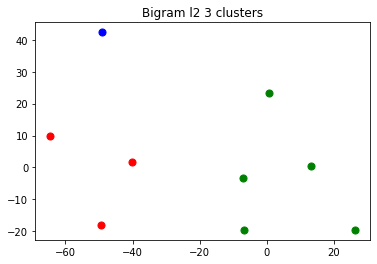

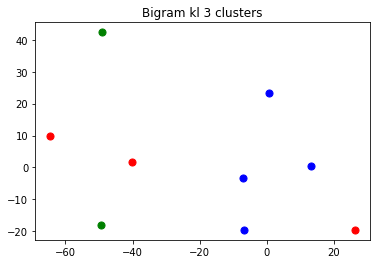

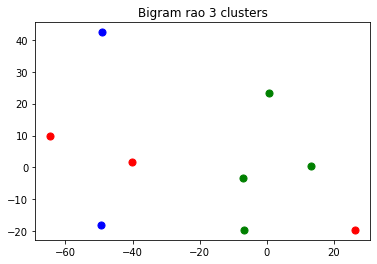

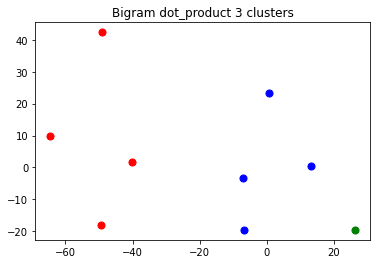

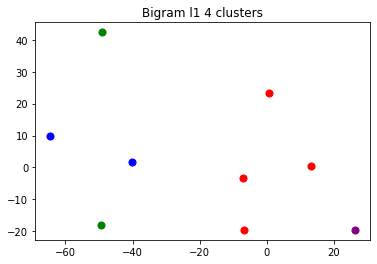

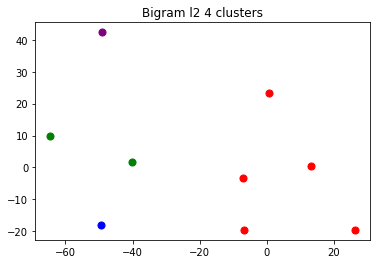

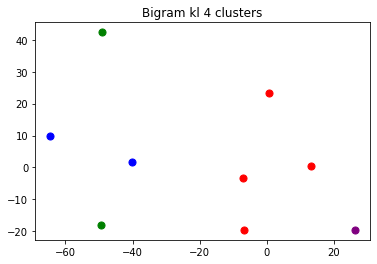

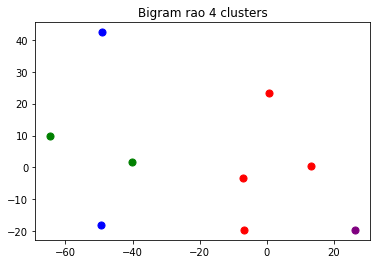

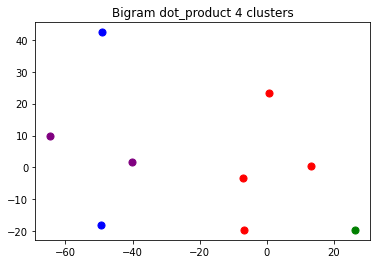

In [55]:
for n in range(2,5):
  for parameter in parameters:
    hc = AgglomerativeClustering(n_clusters=n,affinity='euclidean',linkage='ward')
    y_hc = hc.fit_predict(matrix_bigram[parameters.index(parameter)])
    plt.scatter(bigram_TSNE[y_hc==0, 0], bigram_TSNE[y_hc==0, 1], s=50, marker='o', color='red')
    plt.scatter(bigram_TSNE[y_hc==1, 0], bigram_TSNE[y_hc==1, 1], s=50, marker='o', color='blue')
    plt.scatter(bigram_TSNE[y_hc==2, 0], bigram_TSNE[y_hc==2, 1], s=50, marker='o', color='green')
    plt.scatter(bigram_TSNE[y_hc==3, 0], bigram_TSNE[y_hc==3, 1], s=50, marker='o', color='purple')
    plt.scatter(bigram_TSNE[y_hc==4, 0], bigram_TSNE[y_hc==4, 1], s=50, marker='o', color='orange')
    plt.scatter(bigram_TSNE[y_hc==5, 0], bigram_TSNE[y_hc==5, 1], s=50, marker='o', color='magenta')
    plt.scatter(bigram_TSNE[y_hc==6, 0], bigram_TSNE[y_hc==6, 1], s=50, marker='o', color='cyan')
    plt.title("Bigram "+ str(parameter) + " " + str(n) + " clusters")
    plt.show()